# E-Commerce Shipping Analysis
##### Shipment of products delivered on time or not? To fulfill e-commerce customer Demand

# Data Description
Source: https://www.kaggle.com/datasets/prachi13/customer-analytics <br>
The dataset used for model building contained 10999 observations of 12 variables.<br>
The data contains the following information:
1. ID: ID Number of Customers.
2. Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
3. Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
4. Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
5. Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
6. Cost of the product: Cost of the Product in US Dollars.
7. Prior purchases: The Number of Prior Purchase.
8. Product importance: The company has categorized the product in the various parameter such as low, medium, high.
9. Gender: Male and Female.
10. Discount offered: Discount offered on that specific product.
11. Weight in gms: It is the weight in grams.
12. Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

This data of Product Shipment Tracking, answer instantly to your questions:

- What was Customer Rating? And was the product delivered on time?<br>
- Is Customer query is being answered?<br>
- If Product importance is high. having higest rating or being delivered on time?

# Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn import preprocessing

# VIF Score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Split Dataset
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Model Evaluation
from sklearn.metrics import  recall_score, precision_score, f1_score, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Hypothesis Testing
import scipy.stats as st

In [2]:
!pip install lightgbm

In [3]:
!pip install xgboost

In [4]:
!pip install catboost

# Load Dataset

In [5]:
df = pd.read_csv('Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


# General Information & Data Cleaning

In [6]:
df.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
2682,2683,D,Ship,4,4,279,5,medium,F,56,2697,1
1179,1180,B,Ship,5,4,186,10,low,F,24,3621,1
4329,4330,B,Ship,5,2,172,2,high,F,1,5112,0
4827,4828,B,Ship,3,2,109,3,low,M,4,5746,0
10347,10348,B,Ship,3,4,269,3,medium,M,8,5364,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Observation: 
1. Data contains 12 column with 10999 rows
2. The data type in each column is appropriate
3. No missing values found, let's check to make sure there are no missing values

In [8]:
# set column to lowercase
df.columns=df.columns.str.lower()
df.columns

Index(['id', 'warehouse_block', 'mode_of_shipment', 'customer_care_calls',
       'customer_rating', 'cost_of_the_product', 'prior_purchases',
       'product_importance', 'gender', 'discount_offered', 'weight_in_gms',
       'reached.on.time_y.n'],
      dtype='object')

### Check Missing Values

In [9]:
df.isna().sum()

id                     0
warehouse_block        0
mode_of_shipment       0
customer_care_calls    0
customer_rating        0
cost_of_the_product    0
prior_purchases        0
product_importance     0
gender                 0
discount_offered       0
weight_in_gms          0
reached.on.time_y.n    0
dtype: int64

Observation: No missing values found, it has been confirmed that there are no missing values

### Check Duplicates Data

In [10]:
df.duplicated().sum()

0

Observation:
1. No duplicate data found.
2. Since there are no missing values and duplicate data, data cleaning is not necessary

# Data Understanding

### Statistical Summary

In [11]:
df.nunique()

id                     10999
warehouse_block            5
mode_of_shipment           3
customer_care_calls        6
customer_rating            5
cost_of_the_product      215
prior_purchases            8
product_importance         3
gender                     2
discount_offered          65
weight_in_gms           4034
reached.on.time_y.n        2
dtype: int64

In [12]:
# group column names based on type
# for numerical data
nums = ['id', 'customer_care_calls', 'customer_rating', 'cost_of_the_product', 'prior_purchases', 'discount_offered', 'weight_in_gms', 'reached.on.time_y.n']
df_nums = df[nums]

# for categorical data
cats = ['warehouse_block', 'mode_of_shipment', 'product_importance', 'gender']
df_cats = df[cats]

In [13]:
df_nums.describe()

,id,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,discount_offered,weight_in_gms,reached.on.time_y.n
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Observation:
1. *id* is unique
2. Average *customer_care_calls* 4 times
3. Average *customer_rating* is 3 or medium
4. The *cost_of_the_product* range is 48 - 310 with an average of 210
5. The maximum *prior_purchases* and *discount_offered* are 10 and 65. The average *prior_purchases* are 3 times, while the average *discount_offered* is 13
6. The average *weight_in_gms* is 3634 with a maximum weight of 7846
7. Column *id, customer_care_calls, customer_rating, and prior_purchases*  seems to be **symmetrically distributed** (the mean and medium values are almost the same)
8. Columns *cost_of_the_product, discount_offered, and weight_in_gms* seem to have a **skewed distribution**
9. *reached.on.time_y.n* is boolean/binary columns since the value is 0 or 1, so no need to conclude its simmetricity

In [14]:
df_cats.describe()

,warehouse_block,mode_of_shipment,product_importance,gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


Observation:
1. Most *warehouse_block* on F
2. *mode_of_shipment* is dominated by Ship
3. Top *product_importance* is low
4. The female *gender* category is more dominant
5. All category columns have unique values around 2 - 5

### Detect Outliers Using Boxplot¶

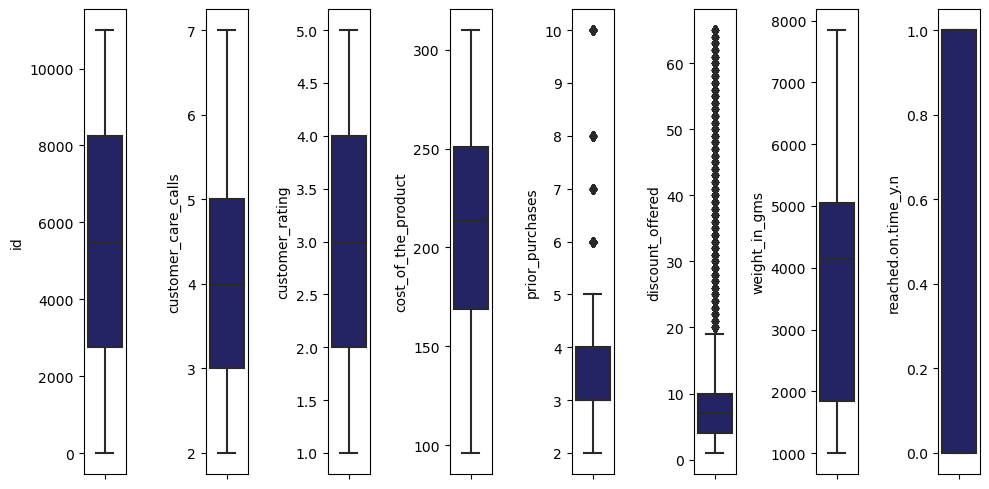

In [15]:
# adjust the figure size for better readability
plt.figure(figsize=(10,5))

# plotting
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='midnightblue')
    plt.tight_layout()

Observation: There are outliers in *prior_purchases and discount_offered*

### Exploratory Data Analysis

In [16]:
# Plotting distribution data (univariate analysis)
def distribution_data(features, hue):
    # adjust the figure size for better readability
    plt.figure(figsize=(15,12))
        
    # plotting distribution
    for i in range(0, len(features)):
        if len(features) % 2 == 0:
            plt.subplot(2, len(features)//2 , i+1)
        else:
            plt.subplot(2, len(features)//2+1 , i+1)
        ax = sns.countplot(x=df[features[i]], data=df, palette = 'mako', hue=hue)
        plt.title('Distribution of ' + features[i], fontdict={'fontsize':12, 'fontweight':'bold'})
        for container in ax.containers:
            ax.bar_label(container)
        plt.xlabel(features[i])
        plt.tight_layout()

In [17]:
# Percentage of Total Sales Based On Feature Predictor (by ID) with Total Feature Predictor
def grouping_cats_feature(col_name, ratio_name):
    df_group = df.groupby(['reached.on.time_y.n',col_name]).agg({'id' : 'nunique'}).reset_index()
    df_group2 = df.groupby(col_name).agg({'id' : 'nunique'}).reset_index() 
    df_group3 = df_group.merge(df_group2, on = col_name)
    df_group3[ratio_name] = df_group3['id_x'] / df_group3['id_y'] * 100
    df_group3[ratio_name] = df_group3[ratio_name].apply(lambda x: round(x,1))
    df_group3.columns = ['late', col_name, 'total_sales', 'total_uniquevalue', ratio_name]
    print(df_group3)

    # visualize grouping_cats_feature
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,2)
    ax = sns.barplot(x=col_name, y=ratio_name, data=df_group3, palette='YlOrBr', hue='late')
    plt.title('Percentage of ' + col_name, fontdict={'fontsize':10, 'fontweight':'bold'})
    for container in ax.containers:
            ax.bar_label(container)
    plt.xlabel(col_name)
    plt.show()

In [18]:
# Percentage of Total Sales Based On Feature Predictor (by ID) with Total Target Variable
def grouping_cats_target(col_name):
    df_group = df.groupby(['reached.on.time_y.n',col_name]).agg({'id' : 'nunique'}).reset_index()
    df_group_late = df.groupby('reached.on.time_y.n').agg({'id' : 'nunique'}).reset_index()
    df_group_late2 = df_group.merge(df_group_late, on = 'reached.on.time_y.n')
    df_group_late2['ratio_late(%)'] = df_group_late2['id_x'] / df_group_late2['id_y'] * 100
    df_group_late2['ratio_late(%)'] = df_group_late2['ratio_late(%)'].apply(lambda x: round(x,1))
    df_group_late2.columns = ['late', col_name, 'total_sales', 'total_late', 'ratio_late(%)']
    print(df_group_late2) 
    
    # visualize grouping_cats_target
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,2)
    ax = sns.barplot(x=col_name, y='ratio_late(%)', data=df_group_late2, palette = 'mako', hue='late')
    plt.title('Percentage of ' + col_name + ' & late', fontdict={'fontsize':10, 'fontweight':'bold'})
    for container in ax.containers:
            ax.bar_label(container)
    plt.xlabel(col_name)
    
    # Pie plot
    plt.subplot(1,2,1)
    size = df[col_name].value_counts()
    labels = size.index
    if len(labels)==2:
        colors = ['maroon', 'whitesmoke']
    if len(labels)==3:
            colors = ['maroon', 'brown', 'whitesmoke']
    if len(labels)==4:
            colors = ['maroon', 'brown', 'indianred', 'whitesmoke']
    if len(labels)==5:
            colors = ['maroon', 'brown', 'indianred', 'lightcoral', 'whitesmoke']
    if len(labels)==6:
            colors = ['maroon', 'brown', 'indianred', 'lightcoral', 'plum', 'whitesmoke']
    if len(labels)==8:
            colors = ['maroon', 'brown', 'indianred', 'lightcoral', 'plum', 'thistle', 'lavender', 'whitesmoke']
    plt.pie(size, colors=colors, explode=tuple([0.1]*len(labels)), labels=labels, shadow=True, autopct='%.2f%%')
    plt.axis('off')
    plt.legend(loc='lower left')
    plt.title('Distribution of ' + col_name, fontdict={'fontsize':12, 'fontweight':'bold'})

In [19]:
# Plotting of continues data with target variable
def relation_with_target (col_name):
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data=df, x=col_name, hue='reached.on.time_y.n', palette='mako')
    plt.title('Relation of '+col_name+' & reached.on.time_y.n', fontdict={'fontsize':10, 'fontweight':'bold'})
    plt.show()

In [20]:
# Percentage of continuous data shipment delay
def table_num (col_name):
    bins = pd.cut(df[col_name], 10)
    df2 = pd.DataFrame(df.groupby(bins)['reached.on.time_y.n'].mean())
    df2['value_count'] = (df.groupby(bins)['reached.on.time_y.n'].count()/sum(df.groupby(bins)['reached.on.time_y.n'].count()))
    df2.rename(columns={'reached.on.time_y.n' : 'delayed_shipments'}, inplace=True)
    
    # Styling bar in table
    df2 = (df2.style.bar(subset=[df2.columns[0]], color='lightsteelblue')
                    .bar(subset=['value_count'], color='thistle')
                    .format(formatter={(df2.columns[0]):'{:,.6%}', ('value_count'):'{:,.6%}'})
          )
    return df2

##### Distribution of Numerical Data

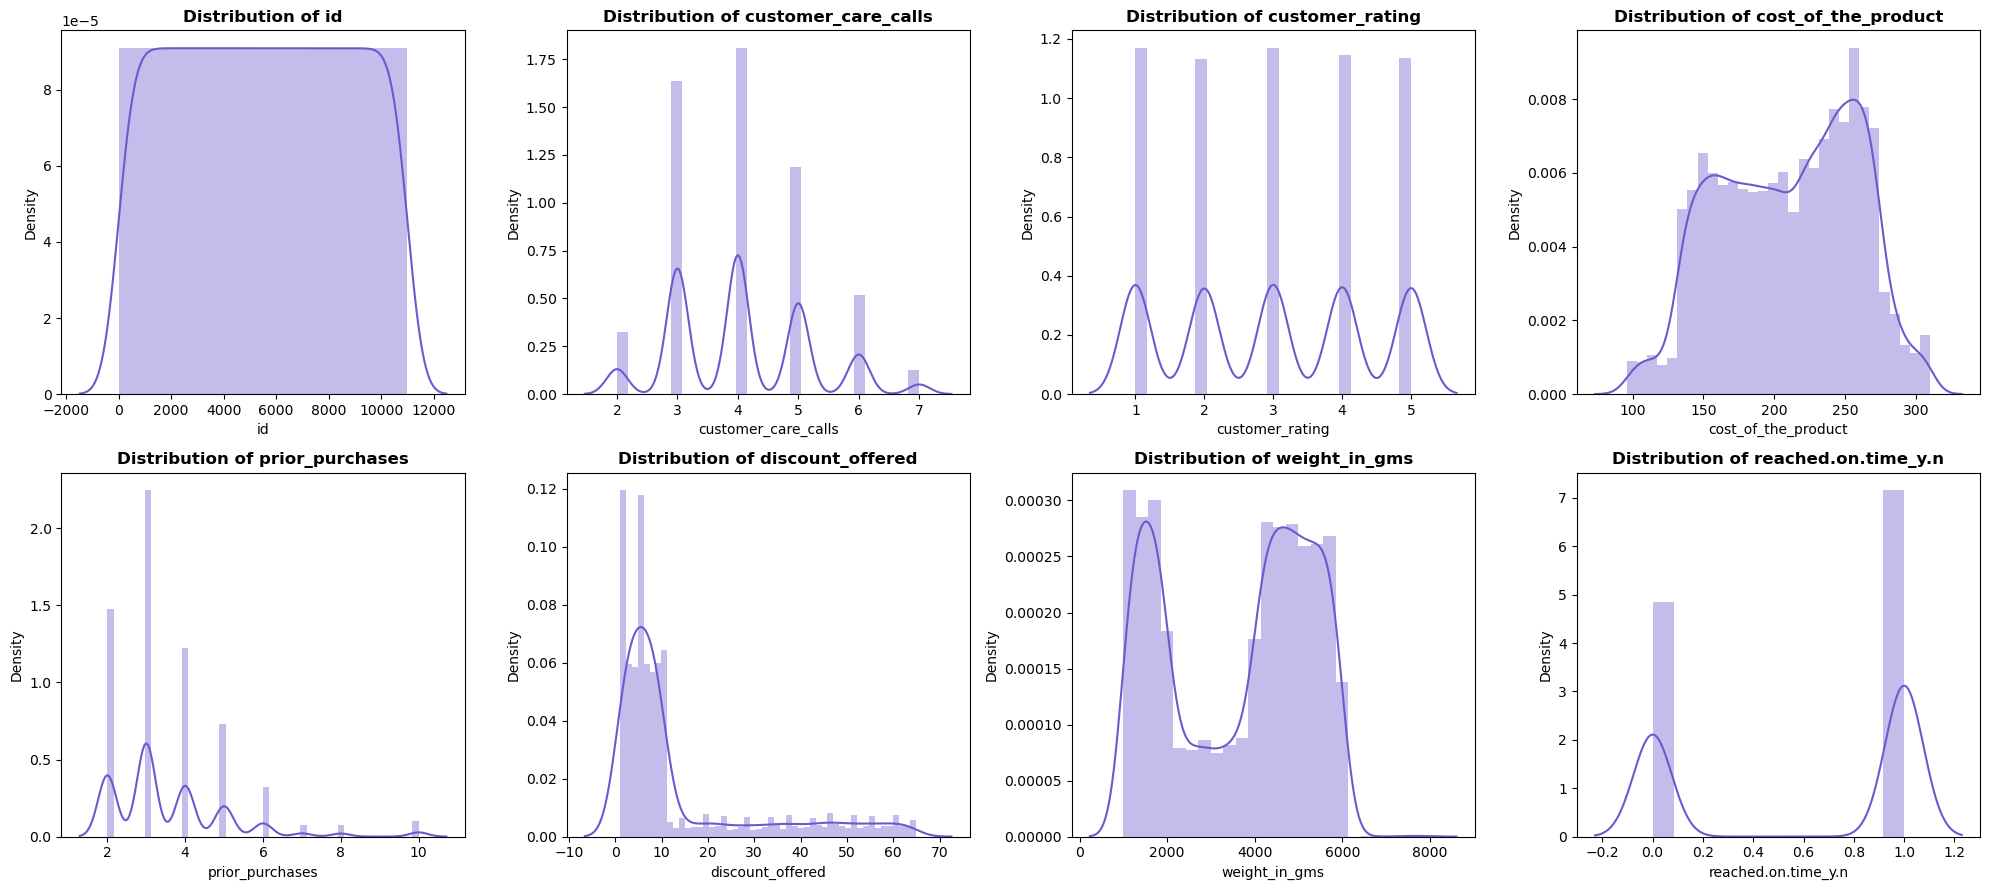

In [21]:
# adjust the figure size for better readability
plt.figure(figsize=(20,9))

# plotting distribution
features = nums
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 , i+1)
    sns.distplot(x = df[features[i]], color = 'slateblue')
    plt.title('Distribution of ' + features[i], fontdict={'fontsize':12, 'fontweight':'bold'})
    plt.xlabel(features[i])
    plt.tight_layout()

Observation: 
1. The *id, customer_care_calls, and cost_of_the_product* columns are close to a normal distribution
2. The distribution in the *customer_rating* column looks even
3. The *prior_purchases and discount_offered* columns have a skew distribution. We need to do something for these columns later.
4. The *weight_in_gms* column is u-shaped so that the distribution is not clearly visible
5. We don't need to pay attention to the distribution of *reached.on.time_y.n* column because it is a binary column

##### Distribution of Categorical Data

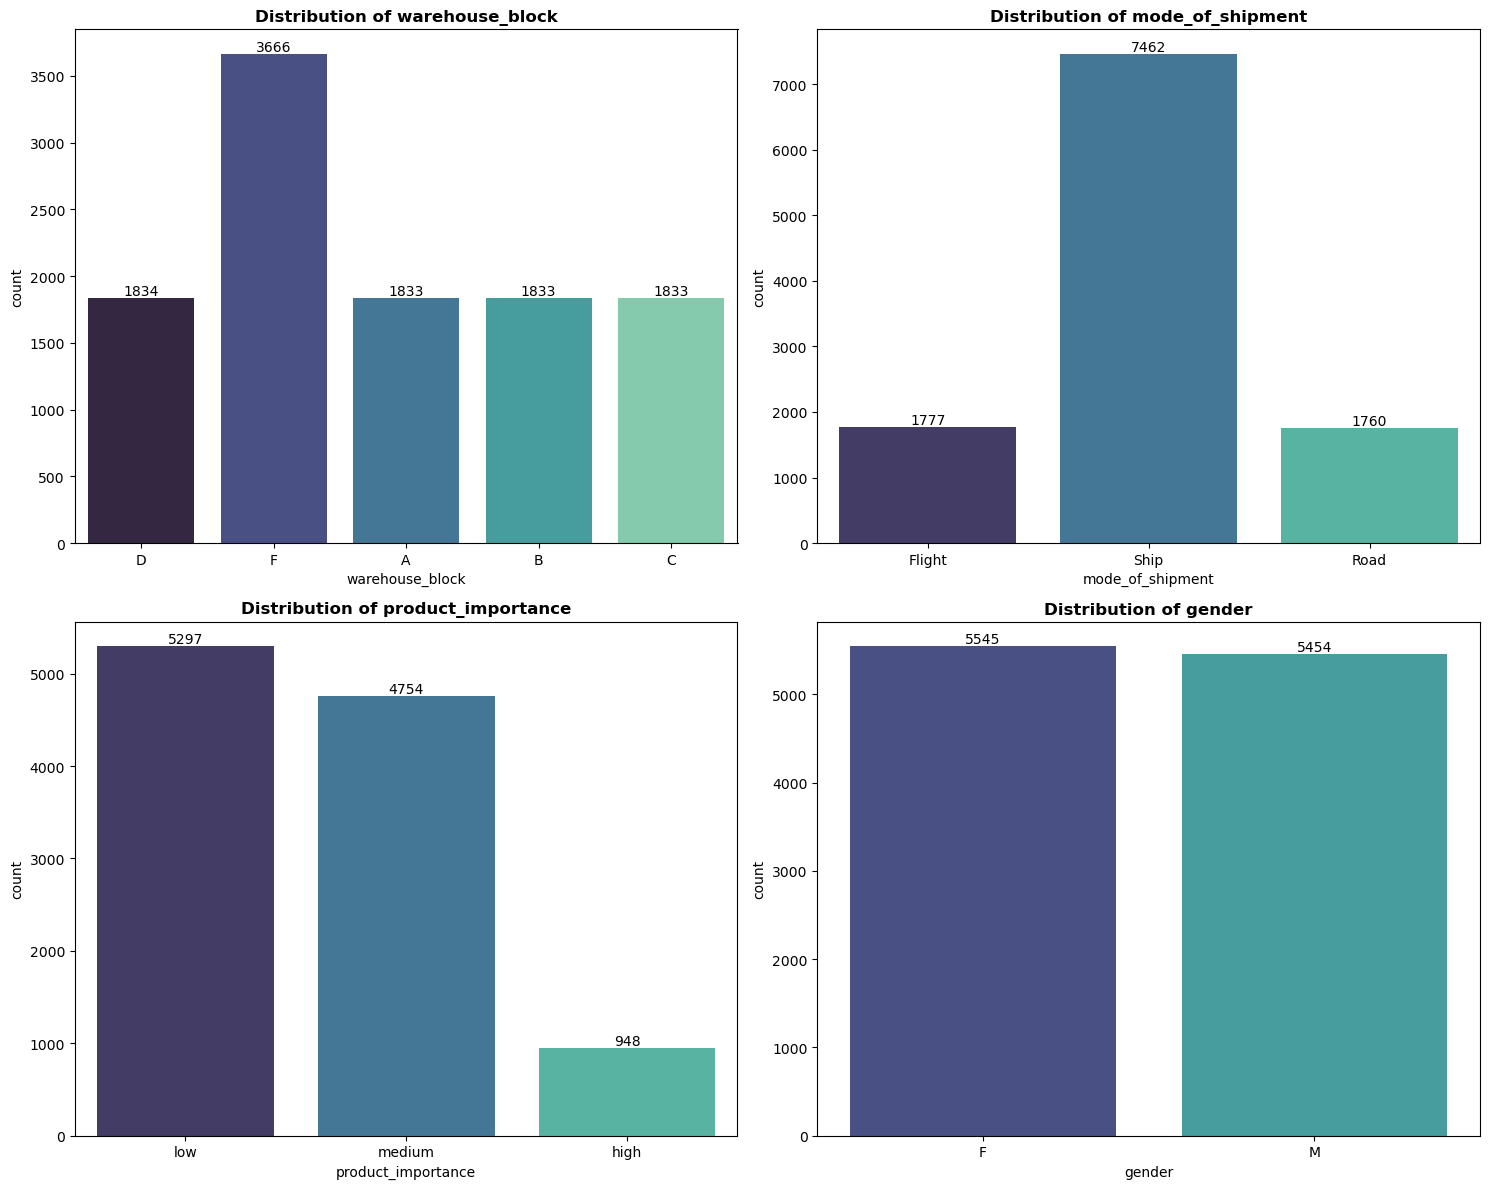

In [22]:
distribution_data(cats, None)

Observation: 
1. In addition to the top value in the *warehouse_block and mode_of_Shipment*, they have the same value
2. In *product_importance*, it can be seen that the low category has a large number, inversely proportional to the high category which has a small amount
3. The difference in the number of women and men is not too much, almost equal

##### Target Variable Based On Categorical Data

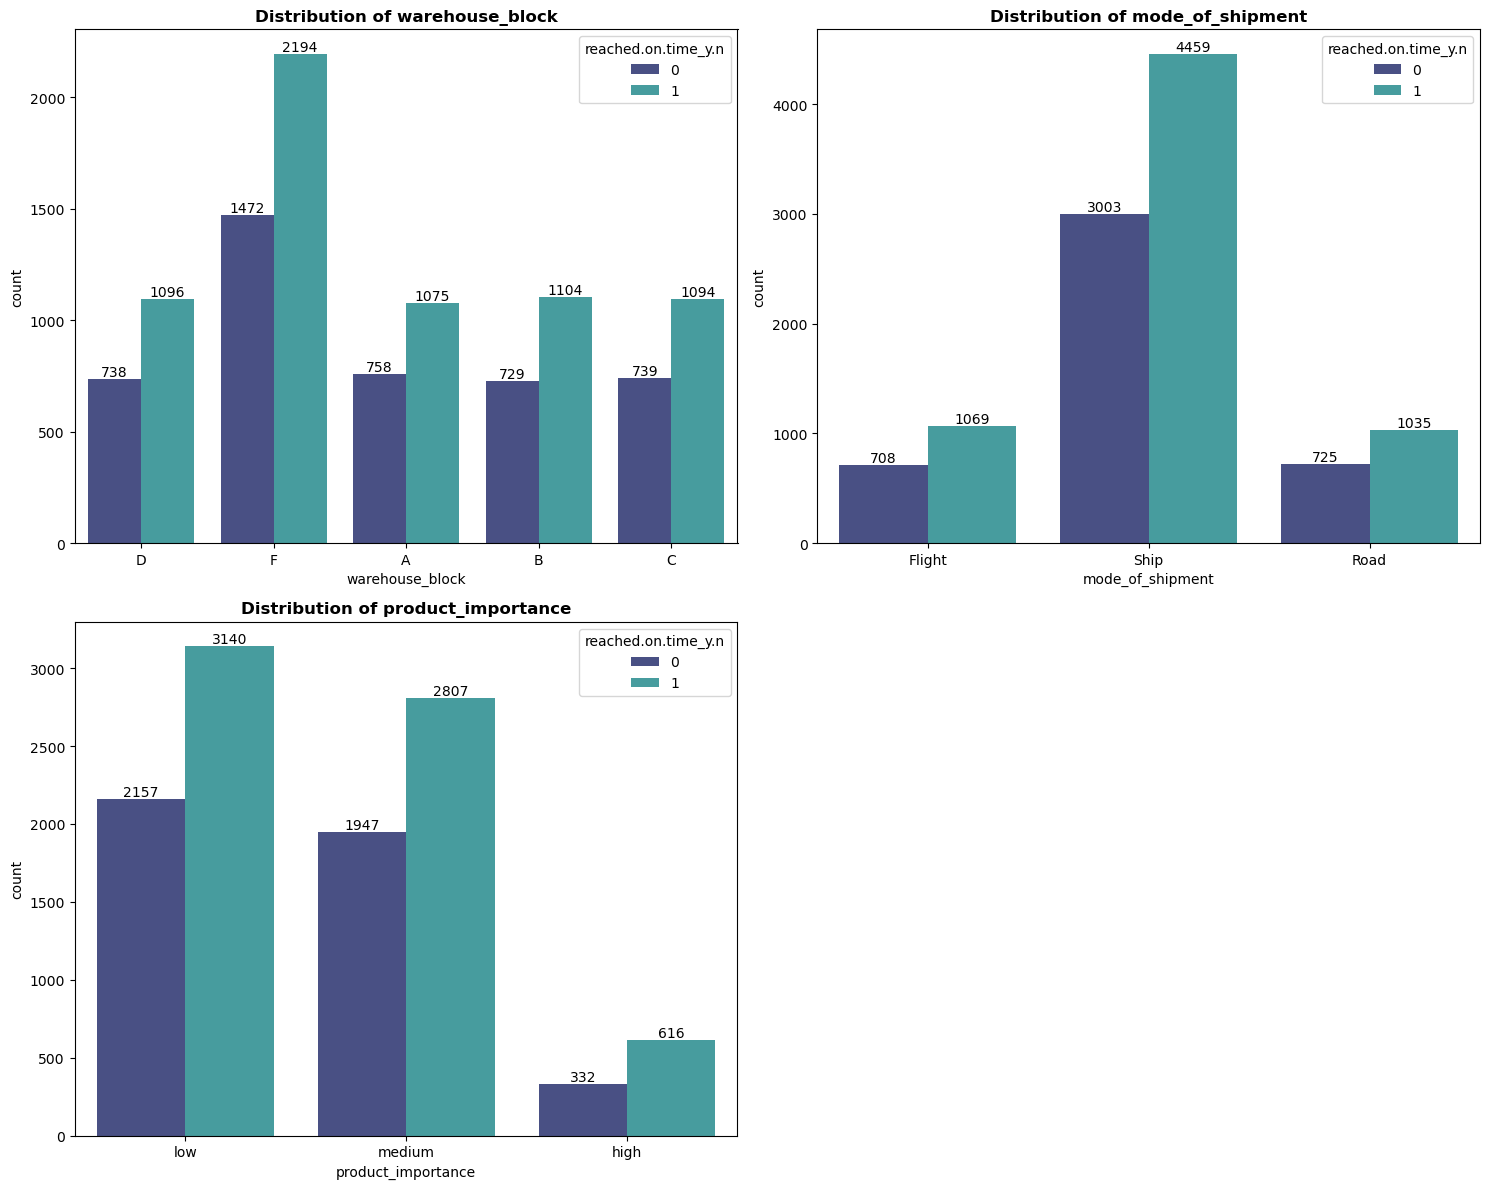

In [23]:
feat = ['warehouse_block', 'mode_of_shipment', 'product_importance']
distribution_data(feat, 'reached.on.time_y.n')

Observation: For *warehouse_block* F, *mode_of_shipment* by Ship, and low *product_importance* tend to experience delays in shipments

##### Exploration on Data Category

   late warehouse_block  total_sales  total_late  ratio_late(%)
0     0               A          758        4436           17.1
1     0               B          729        4436           16.4
2     0               C          739        4436           16.7
3     0               D          738        4436           16.6
4     0               F         1472        4436           33.2
5     1               A         1075        6563           16.4
6     1               B         1104        6563           16.8
7     1               C         1094        6563           16.7
8     1               D         1096        6563           16.7
9     1               F         2194        6563           33.4


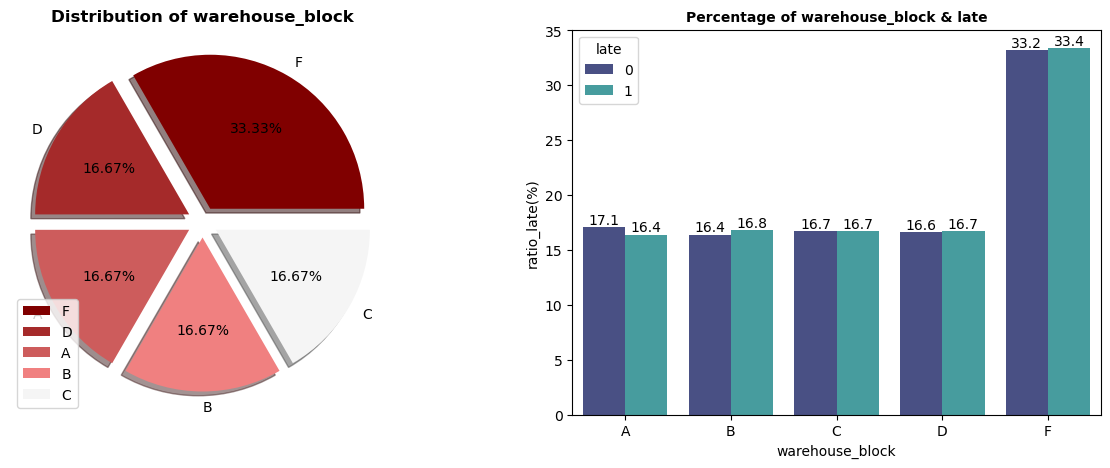

In [24]:
# Percentage of total warehouse_block based on target value
grouping_cats_target('warehouse_block')

   late warehouse_block  total_sales  total_uniquevalue  ratio_block(%)
0     0               A          758               1833            41.4
1     1               A         1075               1833            58.6
2     0               B          729               1833            39.8
3     1               B         1104               1833            60.2
4     0               C          739               1833            40.3
5     1               C         1094               1833            59.7
6     0               D          738               1834            40.2
7     1               D         1096               1834            59.8
8     0               F         1472               3666            40.2
9     1               F         2194               3666            59.8


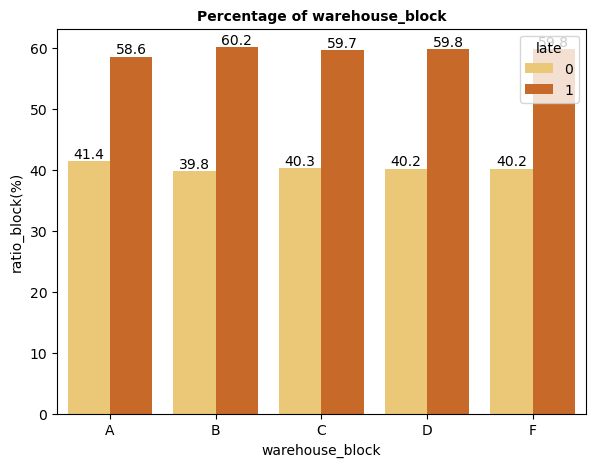

In [25]:
# Percentage of total warehouse_block based on unique value
grouping_cats_feature('warehouse_block', 'ratio_block(%)')

Observation:
1. Shipments from *warehouse_block* F have a higher volume of shipments compared to other blocks even though they have almost the same difference in the percentage of lates (< 1%). But, *warehouse_block* 'F' can accounts for 33% of all shipment volume.
2. However, shipments from block A have a better on-time percentage and a smaller late percentage
3. Block B can be said to have the worst shipment, this is indicated by the smallest percentage of punctuality and the highest percentage of delays. However, its comparison with other blocks is not too far

   late mode_of_shipment  total_sales  total_late  ratio_late(%)
0     0           Flight          708        4436           16.0
1     0             Road          725        4436           16.3
2     0             Ship         3003        4436           67.7
3     1           Flight         1069        6563           16.3
4     1             Road         1035        6563           15.8
5     1             Ship         4459        6563           67.9


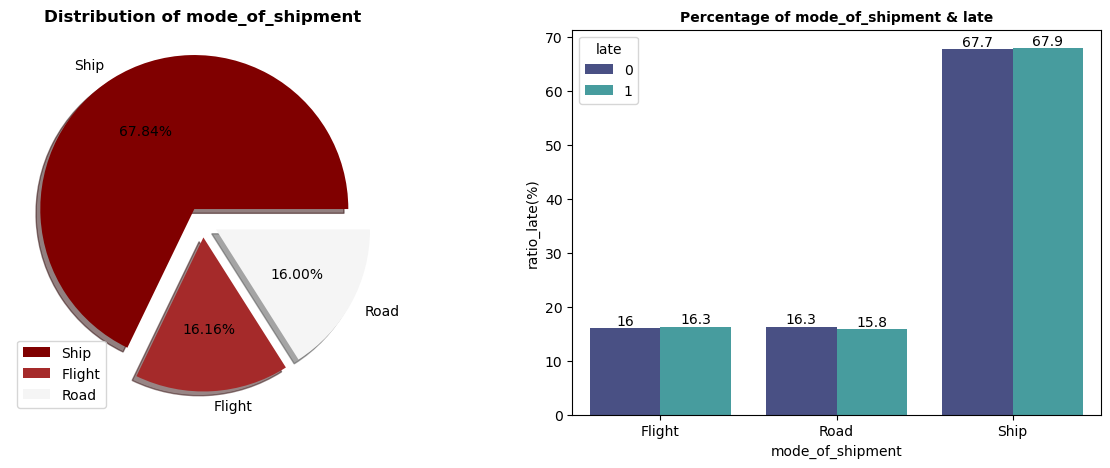

In [26]:
# Percentage of total mode_of_shipment based on target value
grouping_cats_target('mode_of_shipment')

   late mode_of_shipment  total_sales  total_uniquevalue  ratio_shipment(%)
0     0           Flight          708               1777               39.8
1     1           Flight         1069               1777               60.2
2     0             Road          725               1760               41.2
3     1             Road         1035               1760               58.8
4     0             Ship         3003               7462               40.2
5     1             Ship         4459               7462               59.8


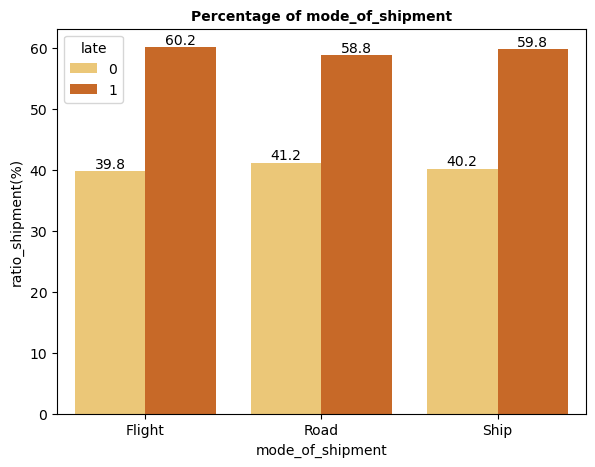

In [27]:
# Percentage of total mode_of_shipment based on unique value
grouping_cats_feature('mode_of_shipment', 'ratio_shipment(%)')

Observation:
1. 68% of all deliveries are made by ship. Shipment delays by Ship tend to be higher due to higher shipping volumes. 
2. However, as can be seen in the graph to the right, it can be seen that shipments by flight tend to experience delays in delivery, while shipments by road tend to be on time

   late product_importance  total_sales  total_late  ratio_late(%)
0     0               high          332        4436            7.5
1     0                low         2157        4436           48.6
2     0             medium         1947        4436           43.9
3     1               high          616        6563            9.4
4     1                low         3140        6563           47.8
5     1             medium         2807        6563           42.8


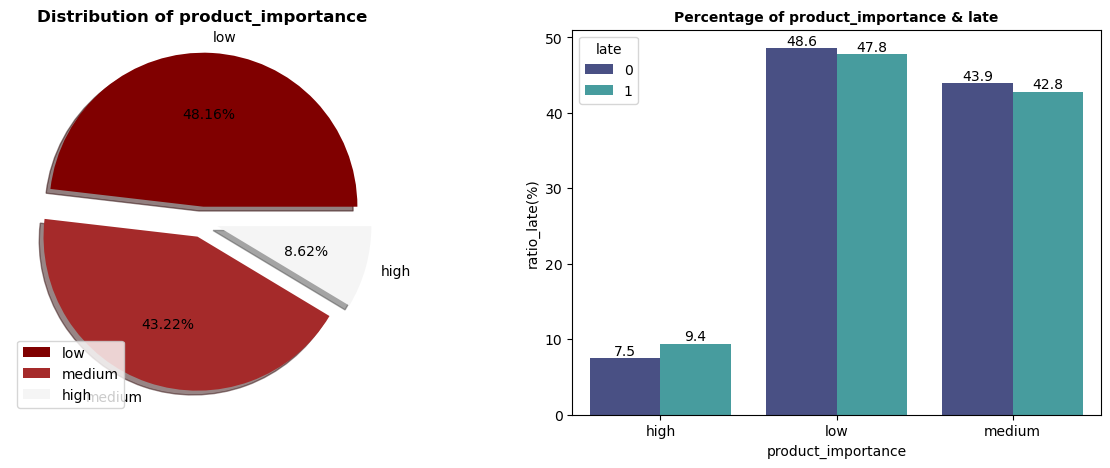

In [28]:
# Percentage of total product_importance based on target value
grouping_cats_target('product_importance')

   late product_importance  total_sales  total_uniquevalue  ratio_product(%)
0     0               high          332                948              35.0
1     1               high          616                948              65.0
2     0                low         2157               5297              40.7
3     1                low         3140               5297              59.3
4     0             medium         1947               4754              41.0
5     1             medium         2807               4754              59.0


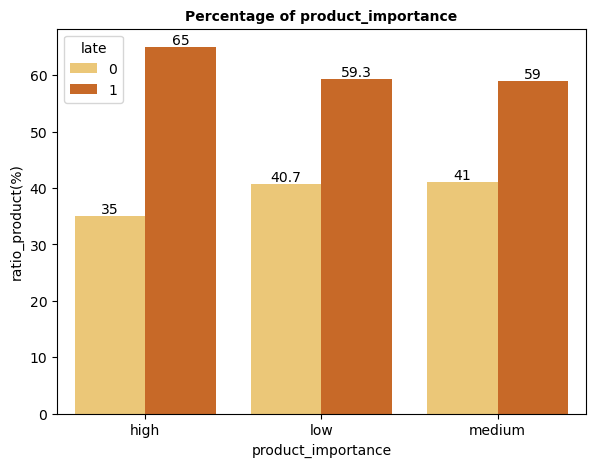

In [29]:
grouping_cats_feature('product_importance', 'ratio_product(%)')

Observation: 
1. Products with medium and low importance show a larger total late shipments due to higher shipping volume, but on time shipments have a higher percentage than late shipments.
2. In contrast to *product_importance* high which tends to be late shipment with small shipping volume, it's only 9% of the total shipping volume.

##### Target Variable Based On Numerical Data

    late  customer_care_calls  total_sales  total_late  ratio_late(%)
0      0                    2          222        4436            5.0
1      0                    3         1206        4436           27.2
2      0                    4         1431        4436           32.3
3      0                    5          968        4436           21.8
4      0                    6          490        4436           11.0
5      0                    7          119        4436            2.7
6      1                    2          416        6563            6.3
7      1                    3         2011        6563           30.6
8      1                    4         2126        6563           32.4
9      1                    5         1360        6563           20.7
10     1                    6          523        6563            8.0
11     1                    7          127        6563            1.9


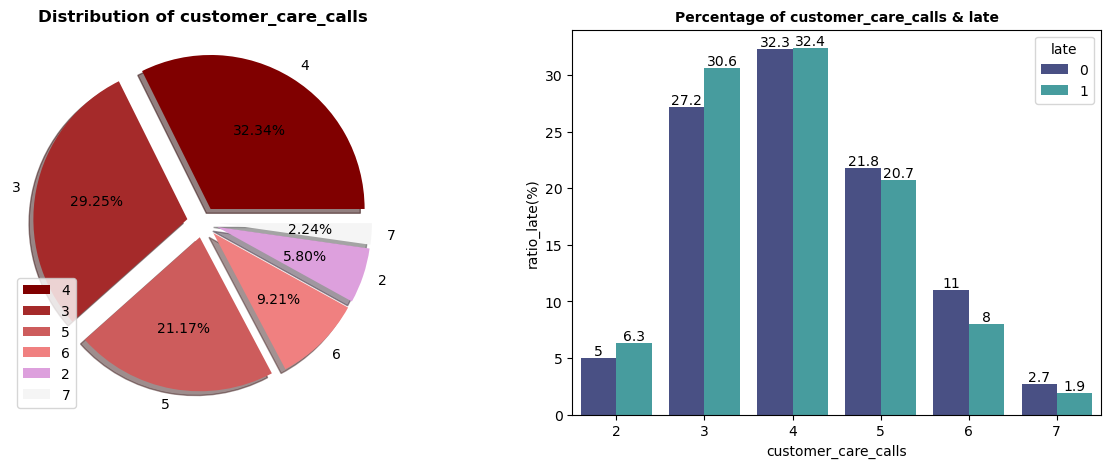

In [30]:
# Percentage of total customer_care_calls based on target value
grouping_cats_target('customer_care_calls')

    late  customer_care_calls  total_sales  total_uniquevalue  ratio_calls(%)
0      0                    2          222                638            34.8
1      1                    2          416                638            65.2
2      0                    3         1206               3217            37.5
3      1                    3         2011               3217            62.5
4      0                    4         1431               3557            40.2
5      1                    4         2126               3557            59.8
6      0                    5          968               2328            41.6
7      1                    5         1360               2328            58.4
8      0                    6          490               1013            48.4
9      1                    6          523               1013            51.6
10     0                    7          119                246            48.4
11     1                    7          127                246   

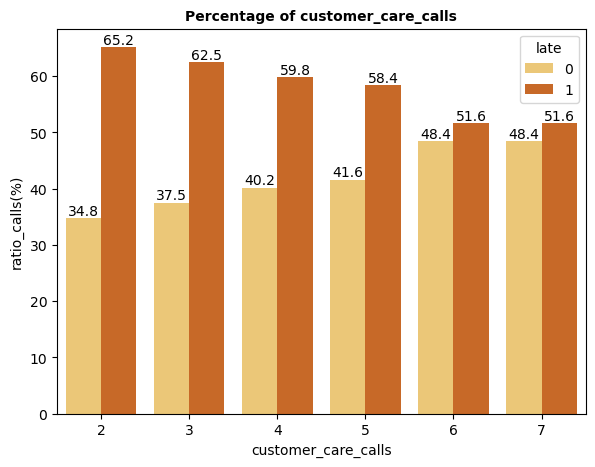

In [31]:
# Percentage of total customer_care_calls based on unique value
grouping_cats_feature('customer_care_calls', 'ratio_calls(%)')

Observation:
1. More than 80% of customers make 3-5 calls during the shipment process
2. The more often the customer calls, the higher the chance that the delivery will be made on time

   late  customer_rating  total_sales  total_late  ratio_late(%)
0     0                1          922        4436           20.8
1     0                2          892        4436           20.1
2     0                3          882        4436           19.9
3     0                4          886        4436           20.0
4     0                5          854        4436           19.3
5     1                1         1313        6563           20.0
6     1                2         1273        6563           19.4
7     1                3         1357        6563           20.7
8     1                4         1303        6563           19.9
9     1                5         1317        6563           20.1


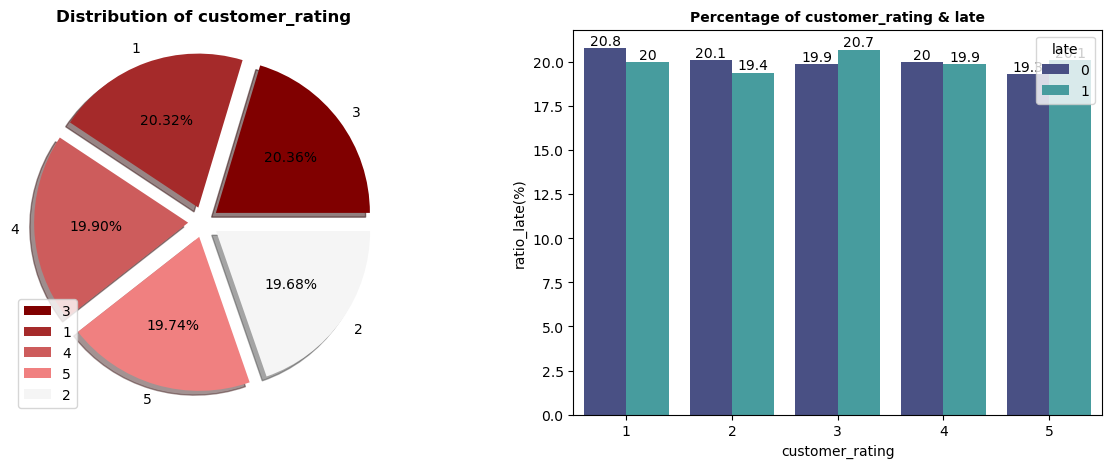

In [32]:
# Percentage of total customer_rating based on target value
grouping_cats_target('customer_rating')

   late  customer_rating  total_sales  total_uniquevalue  ratio_rating(%)
0     0                1          922               2235             41.3
1     1                1         1313               2235             58.7
2     0                2          892               2165             41.2
3     1                2         1273               2165             58.8
4     0                3          882               2239             39.4
5     1                3         1357               2239             60.6
6     0                4          886               2189             40.5
7     1                4         1303               2189             59.5
8     0                5          854               2171             39.3
9     1                5         1317               2171             60.7


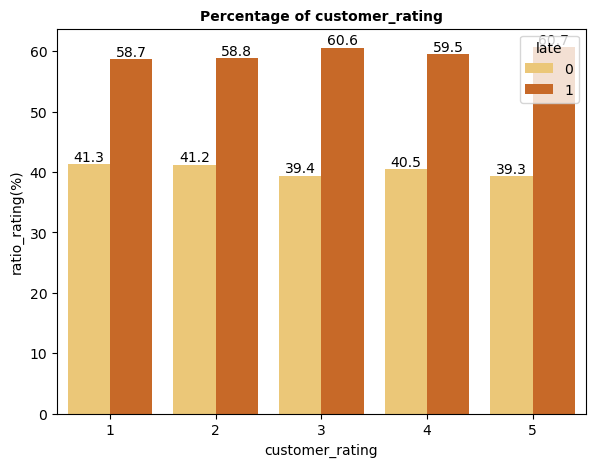

In [33]:
# Percentage of total customer_rating based on unique value
grouping_cats_feature('customer_rating', 'ratio_rating(%)')

Observation: 
1. Customer Rating doesn't really affect shipment. It can be seen that a rating of 1 and 2 is actually given for on time shipment
2. 60% of shipment delays are on products that have a rating of 3-5

    late  prior_purchases  total_sales  total_late  ratio_late(%)
0      0                2          974        4436           22.0
1      0                3         1421        4436           32.0
2      0                4          984        4436           22.2
3      0                5          645        4436           14.5
4      0                6          247        4436            5.6
5      0                7           44        4436            1.0
6      0                8           45        4436            1.0
7      0               10           76        4436            1.7
8      1                2         1625        6563           24.8
9      1                3         2534        6563           38.6
10     1                4         1171        6563           17.8
11     1                5          642        6563            9.8
12     1                6          314        6563            4.8
13     1                7           92        6563            1.4
14     1  

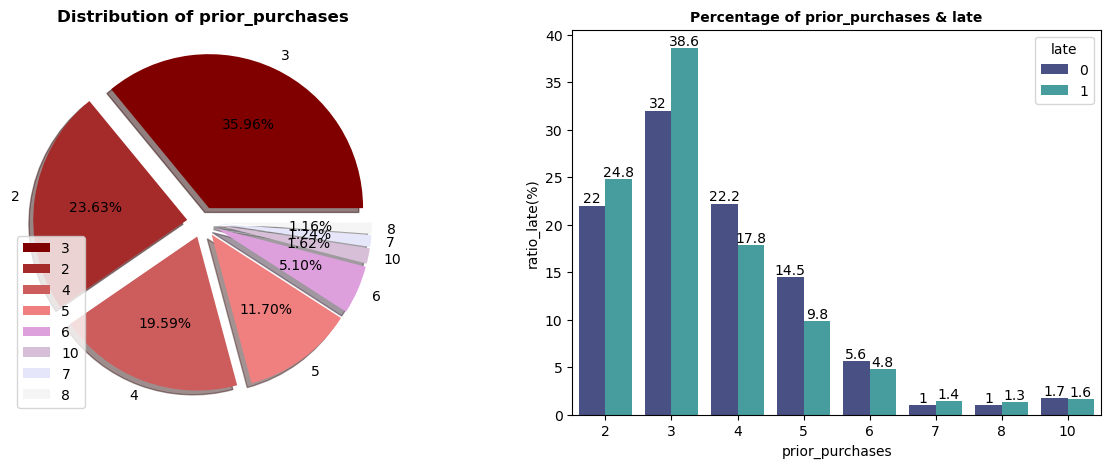

In [34]:
# Percentage of total prior_purchases based on target value
grouping_cats_target('prior_purchases')

    late  prior_purchases  total_sales  total_uniquevalue  ratio_purchases(%)
0      0                2          974               2599                37.5
1      1                2         1625               2599                62.5
2      0                3         1421               3955                35.9
3      1                3         2534               3955                64.1
4      0                4          984               2155                45.7
5      1                4         1171               2155                54.3
6      0                5          645               1287                50.1
7      1                5          642               1287                49.9
8      0                6          247                561                44.0
9      1                6          314                561                56.0
10     0                7           44                136                32.4
11     1                7           92                136       

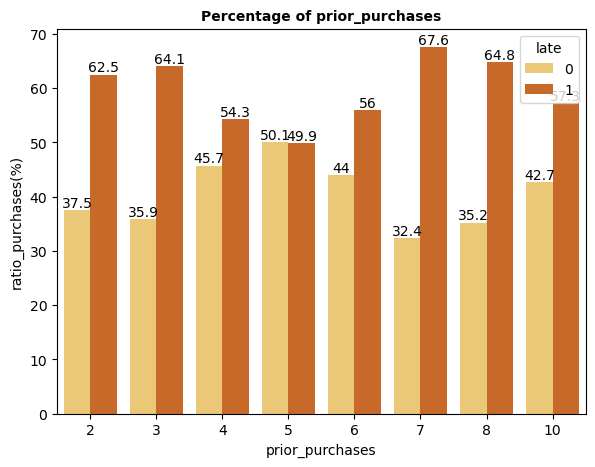

In [35]:
# Percentage of total prior_purchases based on unique value
grouping_cats_feature('prior_purchases', 'ratio_purchases(%)')

Observation: 
1. The highest shipment delay occurs in customers who previously made 2-3 purchases. This is also influenced by the high volume of shipments, which is 60%
2. *prior_purchases* above 4 times tends to experience on time shipment
3. However, after looking deeper, it turns out that shipments don't really have an effect on *prior_purchase*

##### Relation of Continous Data with Target Variable

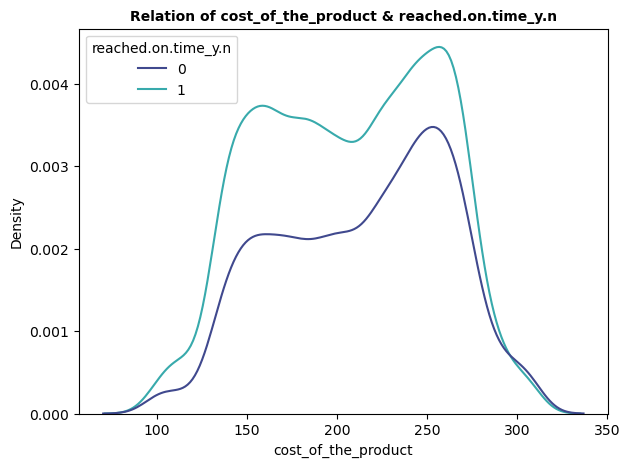

In [36]:
# Relation of cost_of_the_product with Target Variable
relation_with_target('cost_of_the_product')

In [37]:
table_num('cost_of_the_product')

,delayed_shipments,value_count
cost_of_the_product,,
"(95.786, 117.4]",66.216216%,2.018365%
"(117.4, 138.8]",66.353383%,4.836803%
"(138.8, 160.2]",63.161609%,12.882989%
"(160.2, 181.6]",62.960180%,12.101100%
"(181.6, 203.0]",62.197802%,12.410219%
"(203.0, 224.4]",58.882083%,11.873807%
"(224.4, 245.8]",57.546012%,14.819529%
"(245.8, 267.2]",56.097561%,17.519775%
"(267.2, 288.6]",57.187828%,8.664424%


Observation: The higher the cost_of_the_product, the greater the possibility of on time delivery

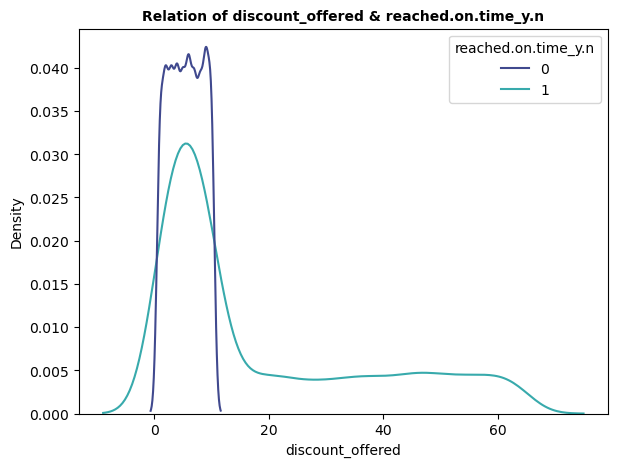

In [38]:
# Relation of discount_offered with Target Variable
relation_with_target('discount_offered')

In [39]:
table_num('discount_offered')

,delayed_shipments,value_count
discount_offered,,
"(0.936, 7.4]",47.297297%,53.150286%
"(7.4, 13.8]",49.212894%,24.256751%
"(13.8, 20.2]",100.000000%,3.036640%
"(20.2, 26.6]",100.000000%,2.418402%
"(26.6, 33.0]",100.000000%,2.818438%
"(33.0, 39.4]",100.000000%,2.682062%
"(39.4, 45.8]",100.000000%,2.554778%
"(45.8, 52.2]",100.000000%,3.391217%
"(52.2, 58.6]",100.000000%,2.627512%


Observation: 
1. Shipments that have a discount of less than 13.8 tend to experience on time shipments, these shipments account for 77% of the total volume
2. All shipments that have a discount offer greater than 13.8 experience delays

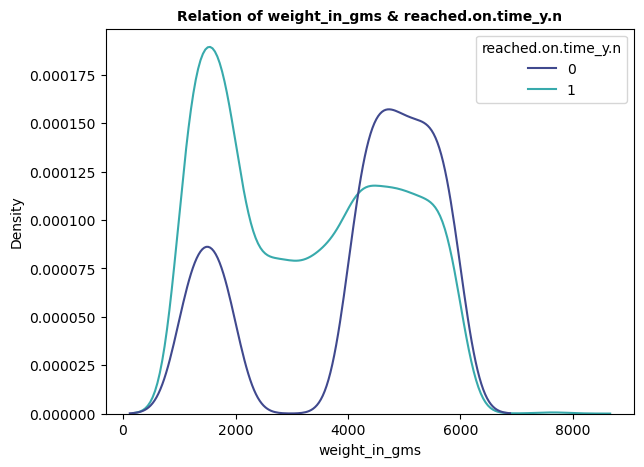

In [40]:
# Relation of weight_in_gms with Target Variable
relation_with_target('weight_in_gms')

In [41]:
table_num('weight_in_gms')

,delayed_shipments,value_count
weight_in_gms,,
"(994.155, 1685.5]",67.610063%,20.238203%
"(1685.5, 2370.0]",75.979305%,12.301118%
"(2370.0, 3054.5]",100.000000%,5.473225%
"(3054.5, 3739.0]",100.000000%,5.673243%
"(3739.0, 4423.5]",53.741054%,13.973998%
"(4423.5, 5108.0]",42.153549%,18.828984%
"(5108.0, 5792.5]",43.028486%,18.192563%
"(5792.5, 6477.0]",41.105354%,5.264115%
"(6477.0, 7161.5]",100.000000%,0.009092%


Observation:
1. Shipment of products weighing less than 4000 grams (4kg) tends to be late, while those more than 4kg tend to be on time. Shipments more than 4kg account for 56% of the total volume 
2. All shipment of products weighing 2370-3739 grams and more than 6477 grams are delayed

## Which rating has an influence on delivery delays, good or bad?

In [42]:
# categorize customer_rating
df['customer_rating_category'] = df['customer_rating'].apply(lambda x: 'bad' if x <= 2 
                                                       else 'average' if x == 3 
                                                       else 'good')
df

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n,customer_rating_category
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,bad
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,good
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,bad
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,average
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1,bad
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0,bad
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0,good
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0,bad


   late customer_rating_category  total_sales  total_late  ratio_late(%)
0     0                  average          882        4436           19.9
1     0                      bad         1814        4436           40.9
2     0                     good         1740        4436           39.2
3     1                  average         1357        6563           20.7
4     1                      bad         2586        6563           39.4
5     1                     good         2620        6563           39.9


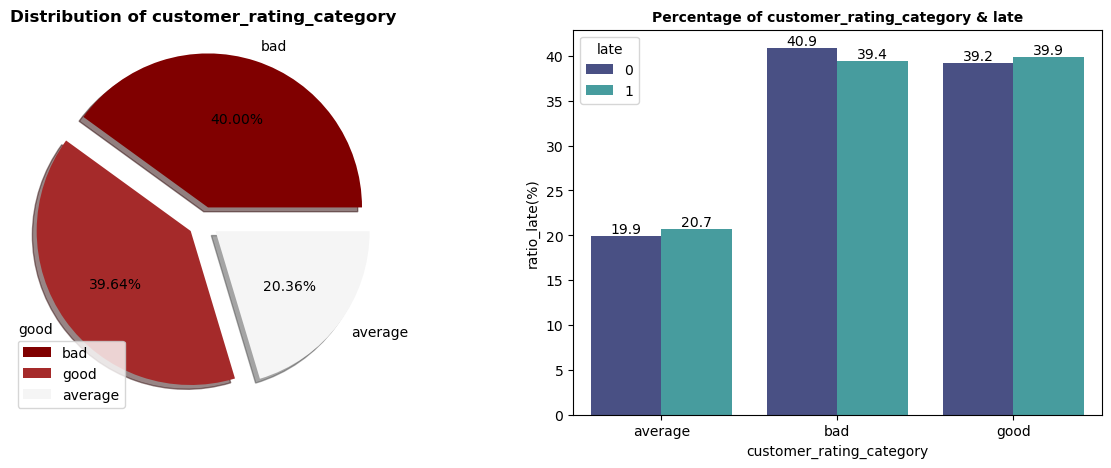

In [43]:
# Percentage of total customer_rating_category based on target value
grouping_cats_target('customer_rating_category')

   late customer_rating_category  total_sales  total_uniquevalue  \
0     0                  average          882               2239   
1     1                  average         1357               2239   
2     0                      bad         1814               4400   
3     1                      bad         2586               4400   
4     0                     good         1740               4360   
5     1                     good         2620               4360   

   ratio_rating_cat(%)  
0                 39.4  
1                 60.6  
2                 41.2  
3                 58.8  
4                 39.9  
5                 60.1  


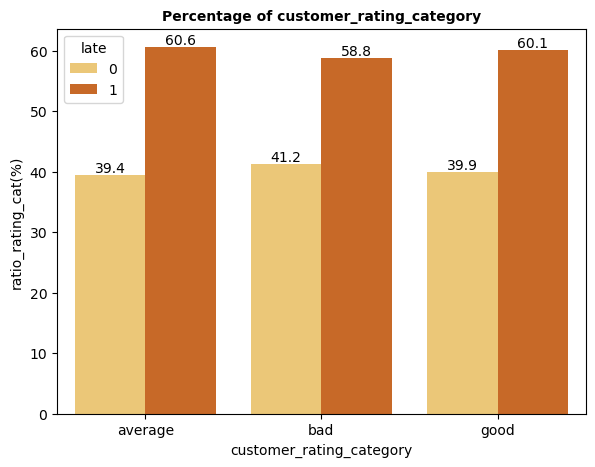

In [44]:
# Percentage of total customer_rating_category based on unique value
grouping_cats_feature('customer_rating_category', 'ratio_rating_cat(%)')

Observation:
1. Surprisingly, bad ratings are given to shipments that tend to be on time compared to good ratings

## How do customers spend money to buy products?

In [45]:
# Plotting distribution data (univariate analysis)
def distribution_cat_cont(data, cat, num, title, hue):
    # adjust the figure size for better readability
    plt.figure(figsize=(12,5))

    # plotting distribution
    plt.subplot(1,2,1)
    ax = sns.barplot(x=data[cat], y=data[num], data=data, palette = 'viridis', hue=hue)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(title, fontdict={'fontsize':12, 'fontweight':'bold'})
    plt.tight_layout()

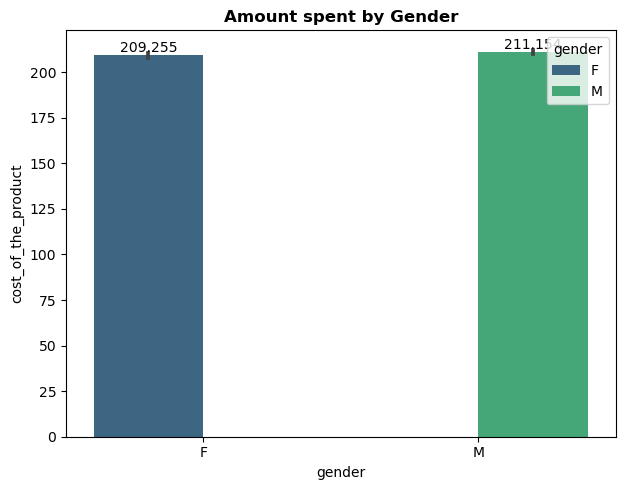

In [46]:
distribution_cat_cont(df, 'gender', 'cost_of_the_product', 'Amount spent by Gender', 'gender')

Observation: Both Female and Male look the same in spending money when buying a product

   reached.on.time_y.n  Frequency  Percentage
0                    1       6563       59.67
1                    0       4436       40.33


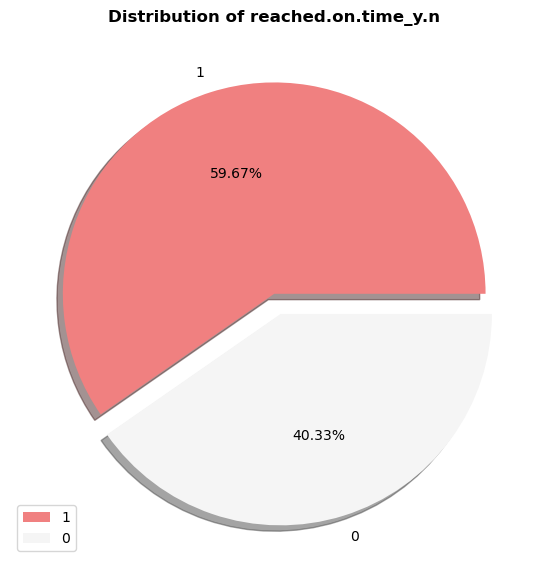

In [47]:
# Frequency and Percentage of reached.on.time_y.n
target = df['reached.on.time_y.n'].value_counts().reset_index()
target.rename(columns={'index':'reached.on.time_y.n','reached.on.time_y.n':'Frequency'}, inplace=True)
target['Percentage'] = round((target['Frequency']/target['Frequency'].sum())*100,2)
print(target)

# Pie plot
plt.figure(figsize=(15,9))
plt.subplot(1,2,1)
labels = df['reached.on.time_y.n'].unique()
size = df['reached.on.time_y.n'].value_counts()
if len(labels)==2:
    colors = ['lightcoral', 'whitesmoke']
    explode = [0, 0.1]
plt.pie(size, colors=colors, explode=explode, labels=labels, shadow=True, autopct='%.2f%%')
plt.axis('off')
plt.legend(loc='lower left')
plt.title('Distribution of reached.on.time_y.n', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.show()

# Outliers Handling

### Remove Outlier Using IQR

In [48]:
# Define IQR for prior_purchases
Q1 = df['prior_purchases'].quantile(0.25)
Q3 = df['prior_purchases'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper limit
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

print('Rows before IQR outlier filter:', len(df))

# Filter data between the limits
df_IQR = df.copy()
df_IQR.drop((df_IQR[(df_IQR['prior_purchases'] < lower_limit)] & df_IQR[(df_IQR['prior_purchases'] > upper_limit)]).index, axis=0, inplace=True)

print('Rows after IQR outlier filter:', len(df_IQR))
print('Rows of removed data:', (len(df)-len(df_IQR)))
print('Percentage of removed data:', (len(df)-len(df_IQR))/100, '%')

Rows before IQR outlier filter: 10999
Rows after IQR outlier filter: 9996
Rows of removed data: 1003
Percentage of removed data: 10.03 %


In [49]:
def visualize_after_remove_outlier(col_name, data):
    # Sanity Check
    fig, axes = plt.subplots(2, 2, figsize = (15,9))

    sns.boxplot(ax = axes[0,0], y = col_name, data = df, color='teal')
    axes[0,0].set_ylabel(ylabel = col_name, fontsize = 12)
    axes[0,0].set_title(col_name+' Before Remove Outlier', fontdict={'fontsize':14, 'fontweight':'bold'})

    sns.boxplot(ax = axes[0,1], y = col_name, data = data, color='teal')
    axes[0,1].set_ylabel(ylabel = col_name, fontsize = 12)
    axes[0,1].set_title(col_name+ ' After Remove Outlier', fontdict={'fontsize':14, 'fontweight':'bold'})

    # Distibution Before Remove Outlier
    sns.distplot(ax = axes[1,0], x = df[col_name], color= 'red')
    axes[1,0].set_xlabel(xlabel = col_name, fontsize = 12)
    axes[1,0].set_ylabel(ylabel = 'Density', fontsize = 12)
    axes[1,0].set_title(col_name+' Before Remove Outlier', fontdict={'fontsize':14, 'fontweight':'bold'})

    # Distribution After Remove Outlier
    sns.distplot(ax = axes[1,1], x = data[col_name], color= 'seagreen')
    axes[1,1].set_xlabel(xlabel = col_name, fontsize= 12)
    axes[1,1].set_ylabel(ylabel = 'Density', fontsize = 12)
    axes[1,1].set_title(col_name+' After Remove Outlier', fontdict={'fontsize':14, 'fontweight':'bold'})
    plt.tight_layout()

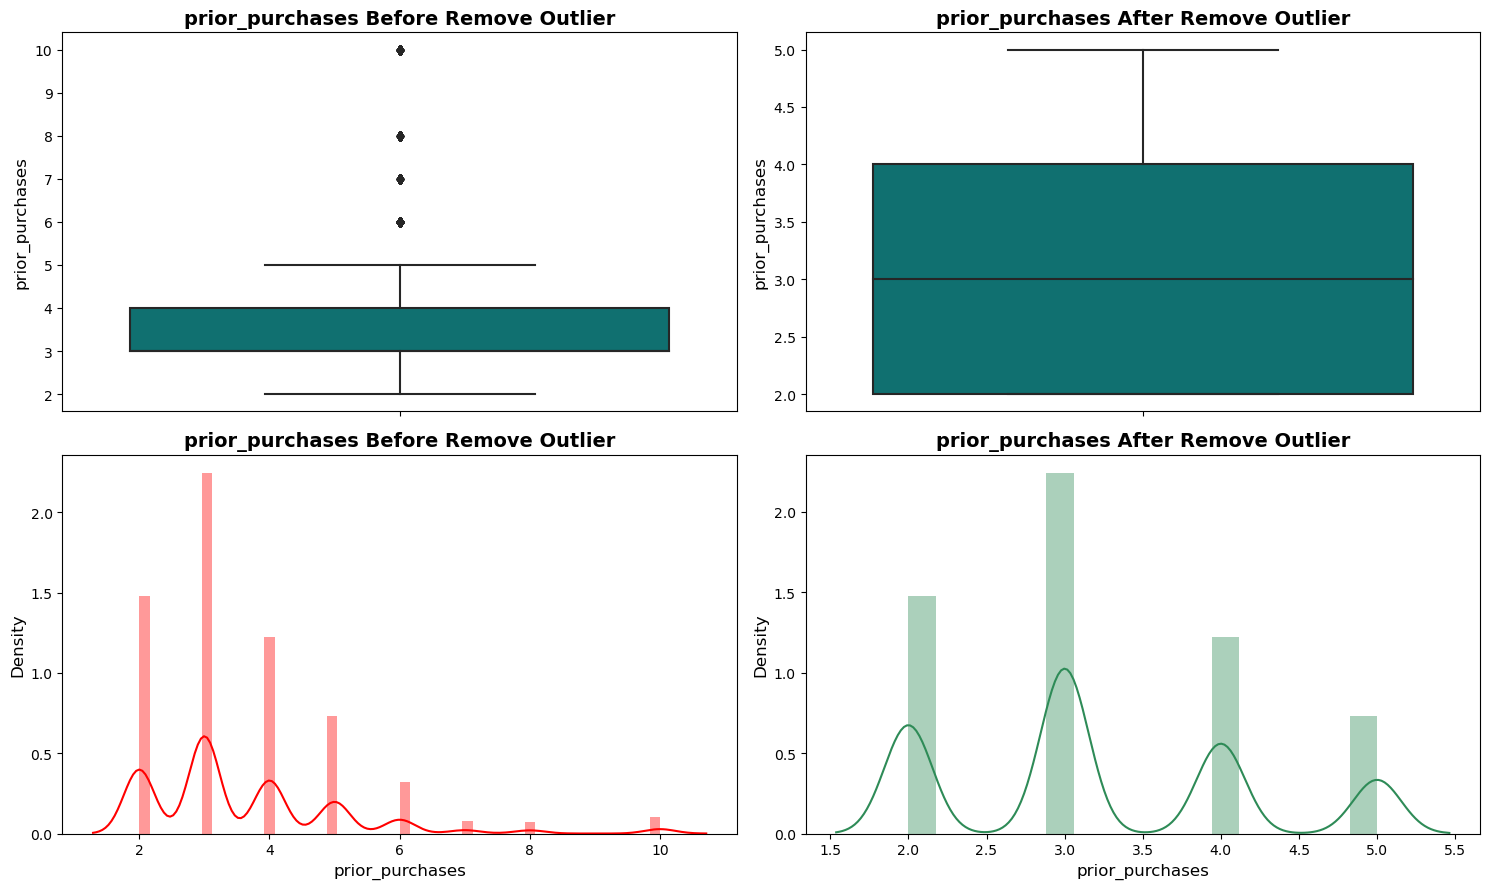

In [50]:
visualize_after_remove_outlier('prior_purchases', df_IQR)

In [51]:
# # Define IQR for discount_offered
# Q1 = df_IQR['discount_offered'].quantile(0.25)
# Q3 = df_IQR['discount_offered'].quantile(0.75)
# IQR = Q3 - Q1

# # Define lower and upper limit
# lower_limit = Q1 - 1.5 * IQR
# upper_limit = Q3 + 1.5 * IQR

# print('Rows before IQR outlier filter:', len(df_IQR))

# # Filter data between the limits
# df_IQR2 = df_IQR.copy()
# df_IQR2 = df_IQR2[(df_IQR2['discount_offered'] > lower_limit) & (df_IQR2['discount_offered'] < upper_limit)]

# print('Rows after IQR outlier filter:', len(df_IQR2))
# print('Percentage of deleted data:', (len(df_IQR)-len(df_IQR2))/100, '%')

In [52]:
# visualize_after_remove_outlier('discount_offered', df_IQR2)

# Feature Selection

In [53]:
df_drop = df_IQR.copy()
# Drop the grouped numeric column
grouping_cols = ['customer_rating']
df_drop.drop(columns = grouping_cols, inplace = True)

# Drop unnecessary columns
unnec_cols = ['id', 'gender']
df_drop.drop(columns = unnec_cols, inplace = True)
df_drop.head()

,warehouse_block,mode_of_shipment,customer_care_calls,cost_of_the_product,prior_purchases,product_importance,discount_offered,weight_in_gms,reached.on.time_y.n,customer_rating_category
0,D,Flight,4,177,3,low,44,1233,1,bad
1,F,Flight,4,216,2,low,59,3088,1,good
2,A,Flight,2,183,4,low,48,3374,1,bad
3,B,Flight,3,176,4,medium,10,1177,1,average
4,C,Flight,2,184,3,medium,46,2484,1,bad


In [54]:
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 10998
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   warehouse_block           9996 non-null   object
 1   mode_of_shipment          9996 non-null   object
 2   customer_care_calls       9996 non-null   int64 
 3   cost_of_the_product       9996 non-null   int64 
 4   prior_purchases           9996 non-null   int64 
 5   product_importance        9996 non-null   object
 6   discount_offered          9996 non-null   int64 
 7   weight_in_gms             9996 non-null   int64 
 8   reached.on.time_y.n       9996 non-null   int64 
 9   customer_rating_category  9996 non-null   object
dtypes: int64(6), object(4)
memory usage: 859.0+ KB


### Check Multicollinerity

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        10999 non-null  int64 
 1   warehouse_block           10999 non-null  object
 2   mode_of_shipment          10999 non-null  object
 3   customer_care_calls       10999 non-null  int64 
 4   customer_rating           10999 non-null  int64 
 5   cost_of_the_product       10999 non-null  int64 
 6   prior_purchases           10999 non-null  int64 
 7   product_importance        10999 non-null  object
 8   gender                    10999 non-null  object
 9   discount_offered          10999 non-null  int64 
 10  weight_in_gms             10999 non-null  int64 
 11  reached.on.time_y.n       10999 non-null  int64 
 12  customer_rating_category  10999 non-null  object
dtypes: int64(8), object(5)
memory usage: 1.1+ MB


##### Check VIF Score

In [56]:
#VIF score are calculated because we need to check which feature that give impact to our target variable and which features that correlated on by other so that we can reduce it to make our model robust and have no bias
#VIF score first diagnosis 
data = df_drop.select_dtypes(include='int64')
X = add_constant(data)

vif_df = pd.DataFrame([vif(X.values, i) 
                      for i in range(X.shape[1])], 
                      index=X.columns).reset_index()
vif_df.columns = ['Features','VIF_score']
vif_df = vif_df.loc[vif_df.Features!='const']
vif_df

,Features,VIF_score
1,customer_care_calls,1.319116
2,cost_of_the_product,1.163175
3,prior_purchases,1.297881
4,discount_offered,1.465815
5,weight_in_gms,1.580189
6,reached.on.time_y.n,1.233247


Observation: No feature has a value greater than 4

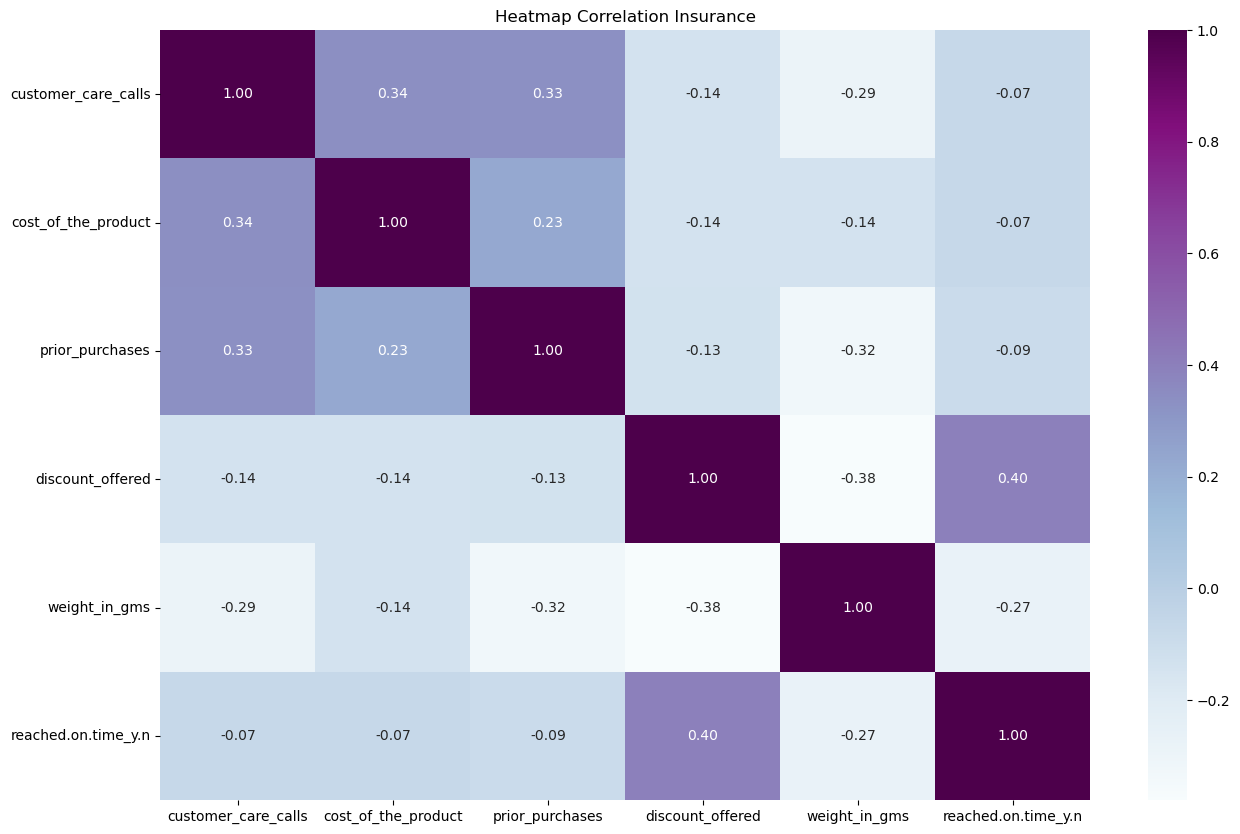

In [57]:
# adjust the figure size for better readability
plt.figure(figsize=(15,10))

# plot the heatmap
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='BuPu', fmt='.2f')
plt.title('Heatmap Correlation Insurance')
plt.show()

Observation: 
1. No feature has high correlation
2. *discount_offered* has the highest positive correlation with the target variable, which is 0.4
3. However, *weight_in_gms* has the highest negative correlation with the target variable

# Feature Engineering

### Label Encoding

In [58]:
df_encod = df_drop.copy()
# Grouping columns
col_label = ['mode_of_shipment']

# showing the precise value counts
for col in col_label:
  print(f"Value counts of \033[1m{col}\033[0m column")
  print(df_encod[col].value_counts(), '\n')

Value counts of mode_of_shipment column
Ship      6783
Flight    1628
Road      1585
Name: mode_of_shipment, dtype: int64 



In [59]:
# Label Encoding for mode_of_shipment
le_vd = preprocessing.LabelEncoder()
le_vd.fit(df_encod['mode_of_shipment'])
df_encod['mode_of_shipment'] = le_vd.transform(df_encod['mode_of_shipment'])

df_encod.head()

,warehouse_block,mode_of_shipment,customer_care_calls,cost_of_the_product,prior_purchases,product_importance,discount_offered,weight_in_gms,reached.on.time_y.n,customer_rating_category
0,D,0,4,177,3,low,44,1233,1,bad
1,F,0,4,216,2,low,59,3088,1,good
2,A,0,2,183,4,low,48,3374,1,bad
3,B,0,3,176,4,medium,10,1177,1,average
4,C,0,2,184,3,medium,46,2484,1,bad


### Ordinal Encoding

In [60]:
# Grouping columns
col_ordinal = ['warehouse_block', 'product_importance', 'customer_rating_category']

# showing the precise value counts
for col in col_ordinal:
  print(f"Value counts of \033[1m{col}\033[0m column")
  print(df_encod[col].value_counts(), '\n')

Value counts of warehouse_block column
F    3335
A    1674
C    1669
D    1659
B    1659
Name: warehouse_block, dtype: int64 

Value counts of product_importance column
low       4910
medium    4265
high       821
Name: product_importance, dtype: int64 

Value counts of customer_rating_category column
bad        4012
good       3948
average    2036
Name: customer_rating_category, dtype: int64 



In [61]:
# Ordinal Encoding for warehouse_block
df_encod['warehouse_block'] = df_encod['warehouse_block'].apply(lambda x: 1 if x == 'A' 
                                                    else 2 if x == 'B' 
                                                    else 3 if x == 'C' 
                                                    else 4 if x == 'D'
                                                    else 5)

# Ordinal Encoding for product_importance
df_encod['product_importance'] = df_encod['product_importance'].apply(lambda x: 1 if x == 'high' 
                                                    else 2 if x == 'medium' 
                                                    else 3)

# Ordinal Encoding for customer_rating_category
df_encod['customer_rating_category'] = df_encod['customer_rating_category'].apply(lambda x: 1 if x == 'bad' 
                                                    else 2 if x == 'average' 
                                                    else 3)

df_encod.head()

,warehouse_block,mode_of_shipment,customer_care_calls,cost_of_the_product,prior_purchases,product_importance,discount_offered,weight_in_gms,reached.on.time_y.n,customer_rating_category
0,4,0,4,177,3,3,44,1233,1,1
1,5,0,4,216,2,3,59,3088,1,3
2,1,0,2,183,4,3,48,3374,1,1
3,2,0,3,176,4,2,10,1177,1,2
4,3,0,2,184,3,2,46,2484,1,1


# Feature Scaling

In [62]:
scaler = MinMaxScaler()
col_norm = df_encod[['prior_purchases', 'discount_offered']]
df_norm = scaler.fit_transform(col_norm)
df_norm = pd.DataFrame(df_norm, columns = col_norm.columns)

std = StandardScaler()
col_std = df_encod[['warehouse_block', 'mode_of_shipment', 'customer_care_calls', 'cost_of_the_product', 'product_importance', 'weight_in_gms', 'customer_rating_category']]
df_std = std.fit_transform(col_std)
df_std = pd.DataFrame(df_std, columns = col_std.columns)

df_scaled = pd.concat([df_norm, df_std, df_encod['reached.on.time_y.n']], axis=1)
df_scaled.shape

(10880, 10)

In [63]:
df_scaled.isna().sum()

prior_purchases             884
discount_offered            884
warehouse_block             884
mode_of_shipment            884
customer_care_calls         884
cost_of_the_product         884
product_importance          884
weight_in_gms               884
customer_rating_category    884
reached.on.time_y.n         884
dtype: int64

In [64]:
df_scaled.dropna(inplace=True)
df_scaled

,prior_purchases,discount_offered,warehouse_block,mode_of_shipment,customer_care_calls,cost_of_the_product,product_importance,weight_in_gms,customer_rating_category,reached.on.time_y.n
0,0.333333,0.671875,0.447516,-1.998014,-0.045448,-0.687866,0.927427,-1.468816,-1.113469,1.0
1,0.000000,0.906250,1.117783,-1.998014,-0.045448,0.122044,0.927427,-0.334795,1.127819,1.0
2,0.666667,0.734375,-1.563287,-1.998014,-1.782745,-0.563264,0.927427,-0.159954,-1.113469,1.0
3,0.666667,0.140625,-0.893020,-1.998014,-0.914097,-0.708633,-0.641992,-1.503050,0.007175,1.0
4,0.333333,0.703125,-0.222752,-1.998014,-1.782745,-0.542497,-0.641992,-0.704039,-1.113469,1.0
...,...,...,...,...,...,...,...,...,...,...
9991,1.000000,0.031250,0.447516,0.638399,0.823200,0.537383,-0.641992,-1.057389,-1.113469,0.0
9992,1.000000,0.000000,-1.563287,0.638399,-0.045448,0.869653,-0.641992,-1.282359,-1.113469,0.0
9993,1.000000,0.078125,-0.893020,0.638399,-0.045448,0.454315,-0.641992,-1.460257,-1.113469,0.0
9994,1.000000,0.046875,-0.222752,0.638399,0.823200,0.661984,0.927427,-1.516499,1.127819,1.0


# Baseline Model Using Logistic Regression

In [65]:
# Split the train data into train and test
X = df_nums.drop(['reached.on.time_y.n'],axis=1)
y = df_nums['reached.on.time_y.n']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Split the train data into train and validation
X = X_train
y = y_train
X_train2, X_val, y_train2, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [66]:
# Modeling using LogisticRegression 
base_model = LogisticRegression(random_state=42)
base_model.fit(X_train2, y_train2)
y_pred_base = base_model.predict(X_val)

In [67]:
# Modeling using LogisticRegression 
base_model = LogisticRegression(random_state=42)
base_model.fit(X_train, y_train)
y_pred_base2 = base_model.predict(X_test)

In [68]:
evaluate_base = pd.DataFrame({'LR Base':['Precision', 'Recall', 'F1-score', 'ROC-AUC', 'Accuracy'],
                         'Validation Base':[precision_score(y_val, y_pred_base), recall_score(y_val, y_pred_base), f1_score(y_val, y_pred_base), roc_auc_score(y_val, y_pred_base), accuracy_score(y_val, y_pred_base)],
                         'Test Base':[precision_score(y_test, y_pred_base2), recall_score(y_test, y_pred_base2), f1_score(y_test, y_pred_base2), roc_auc_score(y_test, y_pred_base2), accuracy_score(y_test, y_pred_base2)]
                       })
evaluate_base

,LR Base,Validation Base,Test Base
0,Precision,0.726013,0.729575
1,Recall,0.648571,0.684291
2,F1-score,0.685111,0.706208
3,ROC-AUC,0.643300,0.657229
4,Accuracy,0.644318,0.662273


### LogisticRegression After Remove Outlier (1)

In [69]:
# Split the train data into train and test
df_IQR = df_IQR.select_dtypes(exclude='object')
X = df_IQR.drop(['reached.on.time_y.n'],axis=1)
y = df_IQR['reached.on.time_y.n']
X_train_IQR, X_test_IQR, y_train_IQR, y_test_IQR = train_test_split(X, y, test_size=0.20, random_state=42)

# Split the train data into train and validation
X = X_train_IQR
y = y_train_IQR
X_train_IQR2, X_val_IQR, y_train_IQR2, y_val_IQR = train_test_split(X, y, test_size=0.20, random_state=42)

In [70]:
# Modeling using LogisticRegression 
lr = LogisticRegression(random_state=42)
lr.fit(X_train_IQR2, y_train_IQR2)
y_pred_lr = lr.predict(X_val_IQR)

In [71]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_IQR, y_train_IQR)
y_pred_lr2 = lr.predict(X_test_IQR)

In [72]:
evaluate_IQR = pd.DataFrame({'LR Remove Outlier1':['Precision', 'Recall', 'F1-score', 'ROC-AUC', 'Accuracy'],
                             'Validation Remove Outlier1':[precision_score(y_val_IQR, y_pred_lr), recall_score(y_val_IQR, y_pred_lr), f1_score(y_val_IQR, y_pred_lr), roc_auc_score(y_val_IQR, y_pred_lr), accuracy_score(y_val_IQR, y_pred_lr)],
                             'Test Remove Outlier1':[precision_score(y_test_IQR, y_pred_lr2), recall_score(y_test_IQR, y_pred_lr2), f1_score(y_test_IQR, y_pred_lr2), roc_auc_score(y_test_IQR, y_pred_lr2), accuracy_score(y_test_IQR, y_pred_lr2)],
                           })
evaluate_IQR

,LR Remove Outlier1,Validation Remove Outlier1,Test Remove Outlier1
0,Precision,0.714597,0.712401
1,Recall,0.681205,0.681818
2,F1-score,0.697501,0.696774
3,ROC-AUC,0.634951,0.639554
4,Accuracy,0.644375,0.647500


### LogisticRegression After Remove Outlier (2)

In [73]:
# # Split the train data into train and test
# df_IQR2 = df_IQR2.select_dtypes(exclude='object')
# X = df_IQR2.drop(['reached.on.time_y.n'],axis=1)
# y = df_IQR2['reached.on.time_y.n']
# X_train_IQR2, X_test_IQR2, y_train_IQR2, y_test_IQR2 = train_test_split(X, y, test_size=0.20, random_state=42)

# # Split the train data into train and validation
# X = X_train_IQR2
# y = y_train_IQR2
# X_train_IQR3, X_val_IQR2, y_train_IQR3, y_val_IQR2 = train_test_split(X, y, test_size=0.20, random_state=42)

In [74]:
# # Modeling using LogisticRegression 
# lr = LogisticRegression(random_state=42)
# lr.fit(X_train_IQR3, y_train_IQR3)
# y_pred_lr = lr.predict(X_val_IQR2)

In [75]:
# lr = LogisticRegression(random_state=42)
# lr.fit(X_train_IQR2, y_train_IQR2)
# y_pred_lr2 = lr.predict(X_test_IQR2)

In [76]:
# evaluate_IQR2 = pd.DataFrame({'LR Remove Outlier2':['Precision', 'Recall', 'F1-score', 'ROC-AUC', 'Accuracy'],
#                              'Validation Remove Outlier2':[precision_score(y_val_IQR2, y_pred_lr), recall_score(y_val_IQR2, y_pred_lr), f1_score(y_val_IQR2, y_pred_lr), roc_auc_score(y_val_IQR2, y_pred_lr), accuracy_score(y_val_IQR2, y_pred_lr)],
#                              'Test Remove Outlier2':[precision_score(y_test_IQR2, y_pred_lr2), recall_score(y_test_IQR2, y_pred_lr2), f1_score(y_test_IQR2, y_pred_lr2), roc_auc_score(y_test_IQR2, y_pred_lr2), accuracy_score(y_test_IQR2, y_pred_lr2)],
#                            })
# evaluate_IQR2

### LogisticRegression After Selected

In [77]:
# Split the train data into train and test
df_drop = df_drop.select_dtypes(exclude='object')
X = df_drop.drop(['reached.on.time_y.n'],axis=1)
y = df_drop['reached.on.time_y.n']
X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(X, y, test_size=0.20, random_state=42)

# Split the train data into train and validation
X = X_train_drop
y = y_train_drop
X_train_drop2, X_val_drop, y_train_drop2, y_val_drop = train_test_split(X, y, test_size=0.20, random_state=42)

In [78]:
# Modeling using LogisticRegression 
lr = LogisticRegression(random_state=42)
lr.fit(X_train_drop2, y_train_drop2)
y_pred_lr = lr.predict(X_val_drop)

In [79]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_drop, y_train_drop)
y_pred_lr2 = lr.predict(X_test_drop)

In [80]:
evaluate_drop = pd.DataFrame({'LR Selected':['Precision', 'Recall', 'F1-score', 'ROC-AUC', 'Accuracy'],
                             'Validation Selected':[precision_score(y_val_drop, y_pred_lr), recall_score(y_val_drop, y_pred_lr), f1_score(y_val_drop, y_pred_lr), roc_auc_score(y_val_drop, y_pred_lr), accuracy_score(y_val_drop, y_pred_lr)],
                             'Test Selected':[precision_score(y_test_drop, y_pred_lr2), recall_score(y_test_drop, y_pred_lr2), f1_score(y_test_drop, y_pred_lr2), roc_auc_score(y_test_drop, y_pred_lr2), accuracy_score(y_test_drop, y_pred_lr2)],
                           })
evaluate_drop

,LR Selected,Validation Selected,Test Selected
0,Precision,0.706710,0.700994
1,Recall,0.678089,0.653199
2,F1-score,0.692104,0.676253
3,ROC-AUC,0.626329,0.622782
4,Accuracy,0.636875,0.628500


### LogisticRegression After Encoding

In [81]:
# Split the train data into train and test
X = df_encod.drop(['reached.on.time_y.n'],axis=1)
y = df_encod['reached.on.time_y.n']
X_train_encod, X_test_encod, y_train_encod, y_test_encod = train_test_split(X, y, test_size=0.20, random_state=42)

# Split the train data into train and validation
X = X_train_encod
y = y_train_encod
X_train_encod2, X_val_encod, y_train_encod2, y_val_encod = train_test_split(X, y, test_size=0.20, random_state=42)

In [82]:
# Modeling using LogisticRegression 
lr = LogisticRegression(random_state=42)
lr.fit(X_train_encod2, y_train_encod2)
y_pred_lr = lr.predict(X_val_encod)

In [83]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_encod, y_train_encod)
y_pred_lr2 = lr.predict(X_test_encod)

In [84]:
evaluate_encod = pd.DataFrame({'LR Encoding':['Precision', 'Recall', 'F1-score', 'ROC-AUC', 'Accuracy'],
                             'Validation Encoding':[precision_score(y_val_encod, y_pred_lr), recall_score(y_val_encod, y_pred_lr), f1_score(y_val_encod, y_pred_lr), roc_auc_score(y_val_encod, y_pred_lr), accuracy_score(y_val_encod, y_pred_lr)],
                             'Test Encoding':[precision_score(y_test_encod, y_pred_lr2), recall_score(y_test_encod, y_pred_lr2), f1_score(y_test_encod, y_pred_lr2), roc_auc_score(y_test_encod, y_pred_lr2), accuracy_score(y_test_encod, y_pred_lr2)],
                           })
evaluate_encod

,LR Encoding,Validation Encoding,Test Encoding
0,Precision,0.702331,0.701770
1,Recall,0.688474,0.667508
2,F1-score,0.695333,0.684211
3,ROC-AUC,0.623672,0.626242
4,Accuracy,0.636875,0.634000


### LogisticRegression After Scaled

In [85]:
# Split the train data into train and test
X = df_scaled.drop(['reached.on.time_y.n'],axis=1)
y = df_scaled['reached.on.time_y.n']
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size=0.20, random_state=42)

# Split the train data into train and validation
X = X_train_scaled
y = y_train_scaled
X_train_scaled2, X_val_scaled, y_train_scaled2, y_val_scaled = train_test_split(X, y, test_size=0.20, random_state=42)

In [86]:
# Modeling using LogisticRegression 
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled2, y_train_scaled2)
y_pred_lr = lr.predict(X_val_scaled)

In [87]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train_scaled)
y_pred_lr2 = lr.predict(X_test_scaled)

In [88]:
evaluate_scaled = pd.DataFrame({'LR Scaled':['Precision', 'Recall', 'F1-score', 'ROC-AUC', 'Accuracy'],
                             'Validation Scaled':[precision_score(y_val_scaled, y_pred_lr), recall_score(y_val_scaled, y_pred_lr), f1_score(y_val_scaled, y_pred_lr), roc_auc_score(y_val_scaled, y_pred_lr), accuracy_score(y_val_scaled, y_pred_lr)],
                             'Test Scaled':[precision_score(y_test_scaled, y_pred_lr2), recall_score(y_test_scaled, y_pred_lr2), f1_score(y_test_scaled, y_pred_lr2), roc_auc_score(y_test_scaled, y_pred_lr2), accuracy_score(y_test_scaled, y_pred_lr2)],
                           })
evaluate_scaled

,LR Scaled,Validation Scaled,Test Scaled
0,Precision,0.712568,0.708929
1,Recall,0.732584,0.694663
2,F1-score,0.722438,0.701723
3,ROC-AUC,0.634778,0.607626
4,Accuracy,0.656379,0.629731


### Comparison of Baseline Model

In [89]:
compare = pd.concat([evaluate_base, evaluate_IQR.drop(['LR Remove Outlier1'],axis=1), evaluate_drop.drop(['LR Selected'],axis=1), evaluate_encod.drop(['LR Encoding'],axis=1), evaluate_scaled.drop(['LR Scaled'],axis=1)], axis=1)
compare

,LR Base,Validation Base,Test Base,Validation Remove Outlier1,Test Remove Outlier1,Validation Selected,Test Selected,Validation Encoding,Test Encoding,Validation Scaled,Test Scaled
0,Precision,0.726013,0.729575,0.714597,0.712401,0.706710,0.700994,0.702331,0.701770,0.712568,0.708929
1,Recall,0.648571,0.684291,0.681205,0.681818,0.678089,0.653199,0.688474,0.667508,0.732584,0.694663
2,F1-score,0.685111,0.706208,0.697501,0.696774,0.692104,0.676253,0.695333,0.684211,0.722438,0.701723
3,ROC-AUC,0.643300,0.657229,0.634951,0.639554,0.626329,0.622782,0.623672,0.626242,0.634778,0.607626
4,Accuracy,0.644318,0.662273,0.644375,0.647500,0.636875,0.628500,0.636875,0.634000,0.656379,0.629731


### Decision Tree

In [90]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled2, y_train_scaled2)
y_pred_dt = dt.predict(X_val_scaled)

In [91]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train_scaled)
y_pred_dt2 = dt.predict(X_test_scaled)

              precision    recall  f1-score   support

         0.0       0.57      0.54      0.55       568
         1.0       0.72      0.74      0.73       890

    accuracy                           0.66      1458
   macro avg       0.64      0.64      0.64      1458
weighted avg       0.66      0.66      0.66      1458



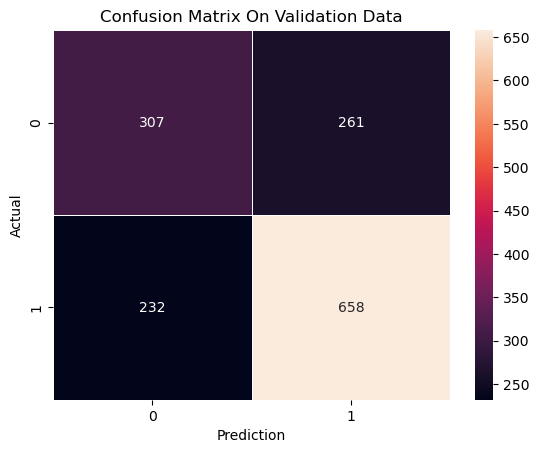

              precision    recall  f1-score   support

         0.0       0.53      0.57      0.55       680
         1.0       0.73      0.70      0.72      1143

    accuracy                           0.65      1823
   macro avg       0.63      0.64      0.63      1823
weighted avg       0.66      0.65      0.66      1823



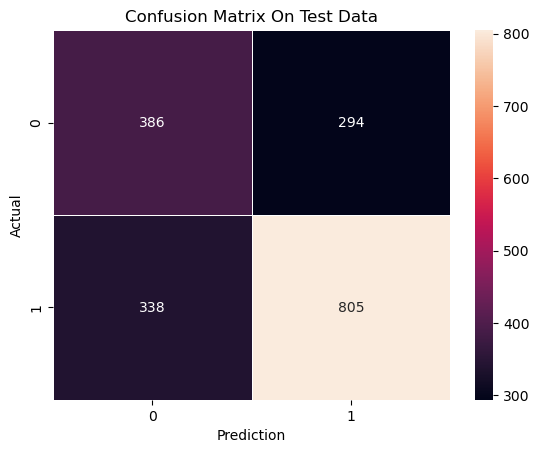

In [92]:
# confusion_matrix on validation data
cm = confusion_matrix(y_val_scaled, y_pred_dt)
print(classification_report(y_val_scaled, y_pred_dt))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Validation Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# confusion_matrix on test data
cm = confusion_matrix(y_test_scaled, y_pred_dt2)
print(classification_report(y_test_scaled, y_pred_dt2))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Test Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

### Random Forest

In [93]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled2, y_train_scaled2)
y_pred_rf = rf.predict(X_val_scaled)

In [94]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train_scaled)
y_pred_rf2 = rf.predict(X_test_scaled)

              precision    recall  f1-score   support

         0.0       0.56      0.65      0.60       568
         1.0       0.75      0.67      0.71       890

    accuracy                           0.66      1458
   macro avg       0.65      0.66      0.65      1458
weighted avg       0.67      0.66      0.67      1458



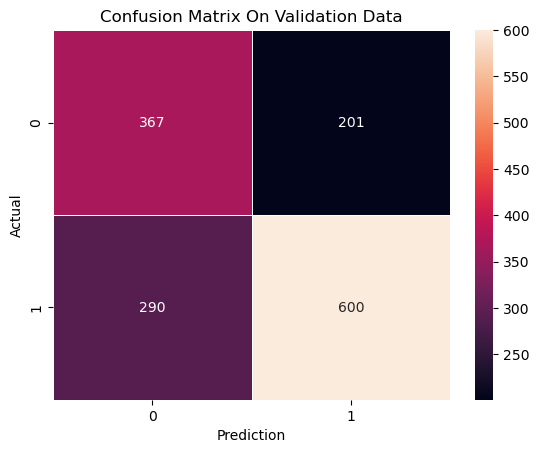

              precision    recall  f1-score   support

         0.0       0.55      0.67      0.60       680
         1.0       0.77      0.68      0.72      1143

    accuracy                           0.67      1823
   macro avg       0.66      0.67      0.66      1823
weighted avg       0.69      0.67      0.68      1823



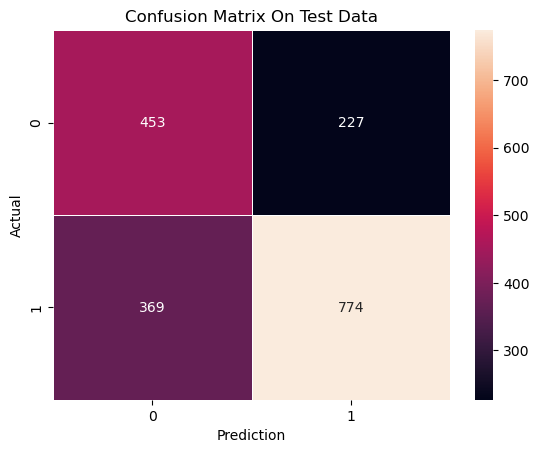

In [95]:
# confusion_matrix on validation data
cm = confusion_matrix(y_val_scaled, y_pred_rf)
print(classification_report(y_val_scaled, y_pred_rf))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Validation Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# confusion_matrix on test data
cm = confusion_matrix(y_test_scaled, y_pred_rf2)
print(classification_report(y_test_scaled, y_pred_rf2))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Test Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

### K-Nearest Neighbors (KNN)

In [96]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled2, y_train_scaled2)
y_pred_knn = knn.predict(X_val_scaled)

In [97]:
knn = RandomForestClassifier(random_state=42)
knn.fit(X_train_scaled, y_train_scaled)
y_pred_knn2 = knn.predict(X_test_scaled)

              precision    recall  f1-score   support

         0.0       0.54      0.54      0.54       568
         1.0       0.70      0.70      0.70       890

    accuracy                           0.64      1458
   macro avg       0.62      0.62      0.62      1458
weighted avg       0.64      0.64      0.64      1458



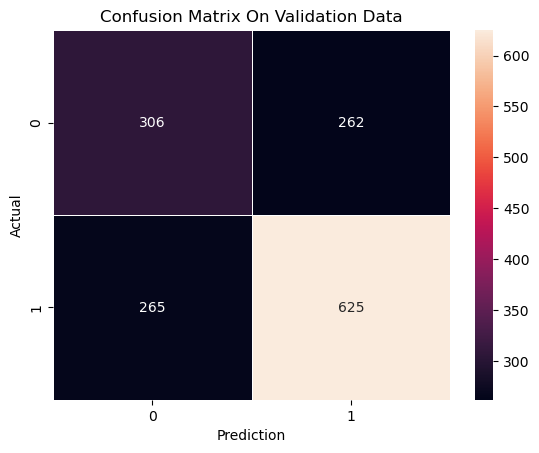

              precision    recall  f1-score   support

         0.0       0.55      0.67      0.60       680
         1.0       0.77      0.68      0.72      1143

    accuracy                           0.67      1823
   macro avg       0.66      0.67      0.66      1823
weighted avg       0.69      0.67      0.68      1823



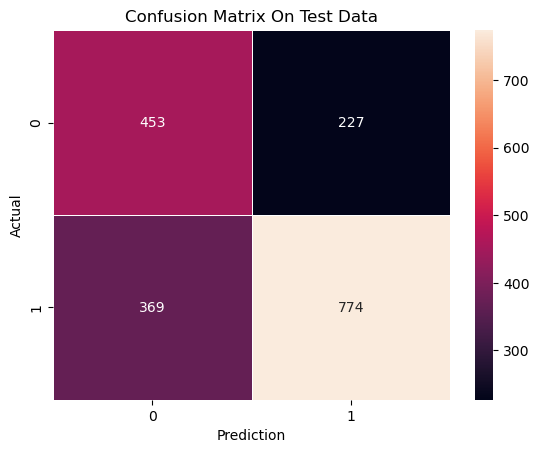

In [98]:
# confusion_matrix on validation data
cm = confusion_matrix(y_val_scaled, y_pred_knn)
print(classification_report(y_val_scaled, y_pred_knn))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Validation Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# confusion_matrix on test data
cm = confusion_matrix(y_test_scaled, y_pred_knn2)
print(classification_report(y_test_scaled, y_pred_knn2))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Test Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

### Naive Bayes

In [99]:
nb = GaussianNB()
nb.fit(X_train_scaled2, y_train_scaled2)
y_pred_nb = nb.predict(X_val_scaled)

In [100]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train_scaled)
y_pred_nb2 = nb.predict(X_test_scaled)

              precision    recall  f1-score   support

         0.0       0.52      1.00      0.69       568
         1.0       0.99      0.42      0.59       890

    accuracy                           0.65      1458
   macro avg       0.76      0.71      0.64      1458
weighted avg       0.81      0.65      0.63      1458



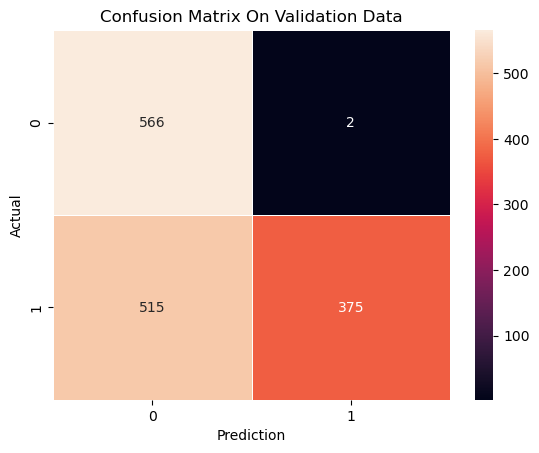

              precision    recall  f1-score   support

         0.0       0.50      0.99      0.67       680
         1.0       0.99      0.42      0.58      1143

    accuracy                           0.63      1823
   macro avg       0.74      0.70      0.63      1823
weighted avg       0.81      0.63      0.61      1823



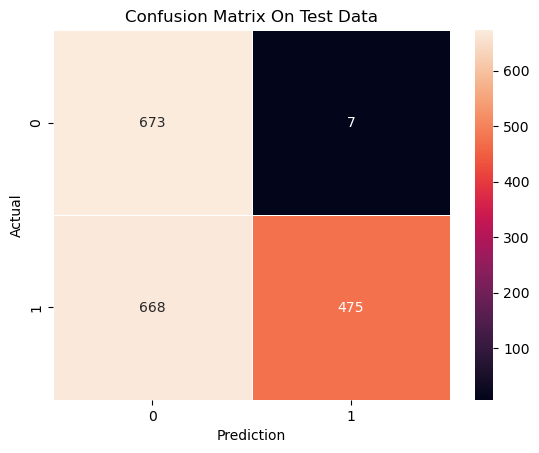

In [101]:
# confusion_matrix on validation data
cm = confusion_matrix(y_val_scaled, y_pred_nb)
print(classification_report(y_val_scaled, y_pred_nb))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Validation Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# confusion_matrix on test data
cm = confusion_matrix(y_test_scaled, y_pred_nb2)
print(classification_report(y_test_scaled, y_pred_nb2))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Test Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

### Support Vector Machine (SVM)

In [102]:
svc = SVC()
svc.fit(X_train_scaled2, y_train_scaled2)
y_pred_svc = svc.predict(X_val_scaled)

In [103]:
svc = SVC()
svc.fit(X_train_scaled, y_train_scaled)
y_pred_svc2 = svc.predict(X_test_scaled)

              precision    recall  f1-score   support

         0.0       0.57      0.71      0.63       568
         1.0       0.78      0.66      0.72       890

    accuracy                           0.68      1458
   macro avg       0.68      0.69      0.68      1458
weighted avg       0.70      0.68      0.68      1458



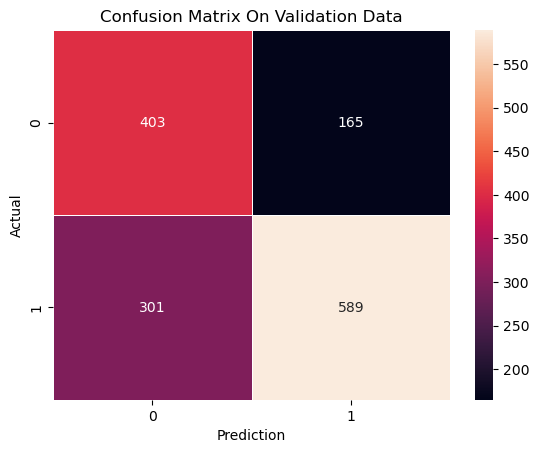

              precision    recall  f1-score   support

         0.0       0.52      0.70      0.60       680
         1.0       0.77      0.62      0.69      1143

    accuracy                           0.65      1823
   macro avg       0.65      0.66      0.64      1823
weighted avg       0.68      0.65      0.65      1823



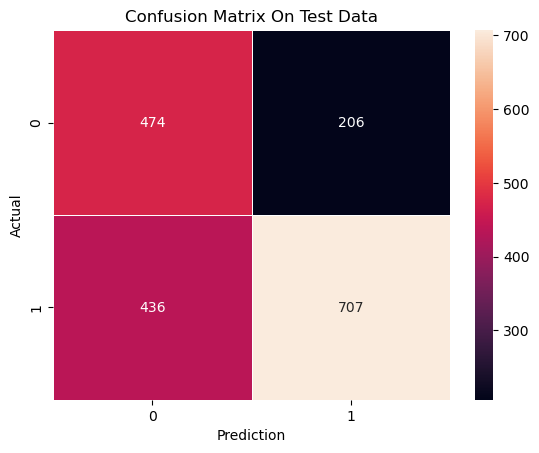

In [104]:
# confusion_matrix on validation data
cm = confusion_matrix(y_val_scaled, y_pred_svc)
print(classification_report(y_val_scaled, y_pred_svc))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Validation Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# confusion_matrix on test data
cm = confusion_matrix(y_test_scaled, y_pred_svc2)
print(classification_report(y_test_scaled, y_pred_svc2))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Test Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

### XGBoost

In [105]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled2, y_train_scaled2)
y_pred_xgb = xgb.predict(X_val_scaled)

In [106]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train_scaled)
y_pred_xgb2 = xgb.predict(X_test_scaled)

              precision    recall  f1-score   support

         0.0       0.55      0.60      0.57       568
         1.0       0.73      0.69      0.71       890

    accuracy                           0.65      1458
   macro avg       0.64      0.64      0.64      1458
weighted avg       0.66      0.65      0.66      1458



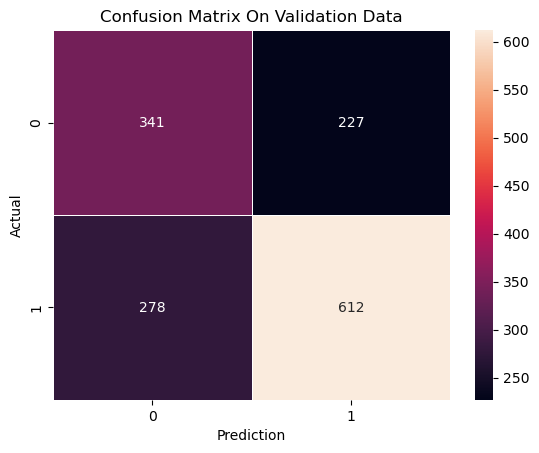

              precision    recall  f1-score   support

         0.0       0.54      0.63      0.59       680
         1.0       0.76      0.68      0.72      1143

    accuracy                           0.66      1823
   macro avg       0.65      0.66      0.65      1823
weighted avg       0.68      0.66      0.67      1823



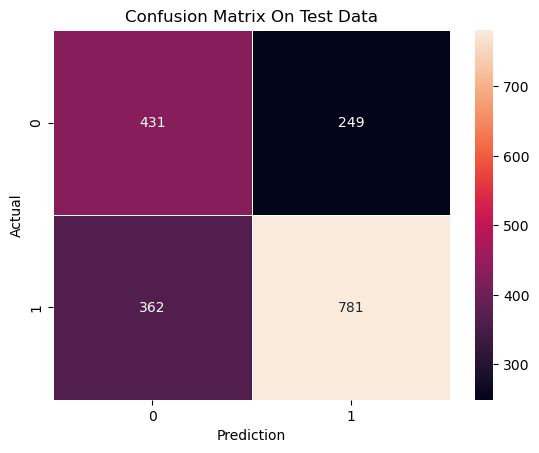

In [107]:
# confusion_matrix on validation data
cm = confusion_matrix(y_val_scaled, y_pred_xgb)
print(classification_report(y_val_scaled, y_pred_xgb))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Validation Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# confusion_matrix on test data
cm = confusion_matrix(y_test_scaled, y_pred_xgb2)
print(classification_report(y_test_scaled, y_pred_xgb2))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Test Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

### CatBoost

In [108]:
cb = CatBoostClassifier(random_state=42)
cb.fit(X_train_scaled2, y_train_scaled2)
y_pred_cb = cb.predict(X_val_scaled)

Learning rate set to 0.021873
0:	learn: 0.6779146	total: 185ms	remaining: 3m 5s
1:	learn: 0.6641161	total: 196ms	remaining: 1m 38s
2:	learn: 0.6521924	total: 208ms	remaining: 1m 9s
3:	learn: 0.6400045	total: 220ms	remaining: 54.8s
4:	learn: 0.6284317	total: 231ms	remaining: 46s
5:	learn: 0.6180620	total: 242ms	remaining: 40.2s
6:	learn: 0.6072237	total: 253ms	remaining: 35.9s
7:	learn: 0.5987020	total: 264ms	remaining: 32.7s
8:	learn: 0.5914589	total: 275ms	remaining: 30.3s
9:	learn: 0.5838634	total: 286ms	remaining: 28.3s
10:	learn: 0.5778093	total: 296ms	remaining: 26.6s
11:	learn: 0.5730462	total: 307ms	remaining: 25.2s
12:	learn: 0.5679941	total: 317ms	remaining: 24.1s
13:	learn: 0.5634232	total: 328ms	remaining: 23.1s
14:	learn: 0.5596832	total: 339ms	remaining: 22.2s
15:	learn: 0.5550607	total: 347ms	remaining: 21.3s
16:	learn: 0.5514105	total: 358ms	remaining: 20.7s
17:	learn: 0.5479348	total: 369ms	remaining: 20.1s
18:	learn: 0.5453377	total: 380ms	remaining: 19.6s
19:	learn: 0

In [109]:
cb = CatBoostClassifier(random_state=42)
cb.fit(X_train_scaled, y_train_scaled)
y_pred_cb2 = cb.predict(X_test_scaled)

Learning rate set to 0.02406
0:	learn: 0.6754930	total: 12.1ms	remaining: 12.1s
1:	learn: 0.6601664	total: 23.6ms	remaining: 11.8s
2:	learn: 0.6470018	total: 35.5ms	remaining: 11.8s
3:	learn: 0.6339500	total: 47ms	remaining: 11.7s
4:	learn: 0.6215250	total: 58.5ms	remaining: 11.6s
5:	learn: 0.6116353	total: 70.7ms	remaining: 11.7s
6:	learn: 0.6003891	total: 82.6ms	remaining: 11.7s
7:	learn: 0.5914358	total: 94.5ms	remaining: 11.7s
8:	learn: 0.5839049	total: 108ms	remaining: 11.9s
9:	learn: 0.5758091	total: 120ms	remaining: 11.9s
10:	learn: 0.5696679	total: 132ms	remaining: 11.9s
11:	learn: 0.5648794	total: 145ms	remaining: 12s
12:	learn: 0.5601027	total: 158ms	remaining: 12s
13:	learn: 0.5549539	total: 171ms	remaining: 12.1s
14:	learn: 0.5508962	total: 185ms	remaining: 12.2s
15:	learn: 0.5463674	total: 200ms	remaining: 12.3s
16:	learn: 0.5423848	total: 210ms	remaining: 12.1s
17:	learn: 0.5385405	total: 223ms	remaining: 12.2s
18:	learn: 0.5357226	total: 235ms	remaining: 12.2s
19:	learn:

              precision    recall  f1-score   support

         0.0       0.55      0.68      0.61       568
         1.0       0.76      0.65      0.70       890

    accuracy                           0.66      1458
   macro avg       0.66      0.67      0.66      1458
weighted avg       0.68      0.66      0.67      1458



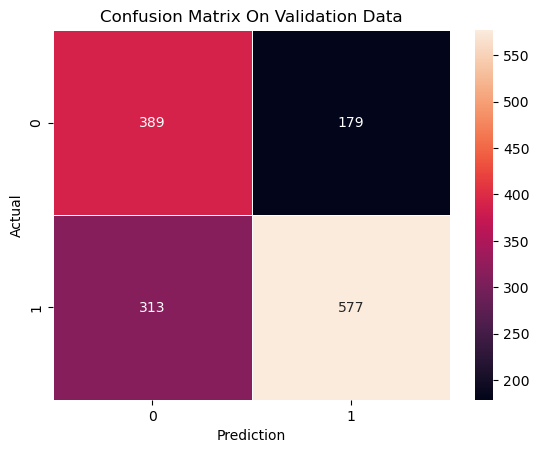

              precision    recall  f1-score   support

         0.0       0.54      0.69      0.61       680
         1.0       0.78      0.65      0.71      1143

    accuracy                           0.67      1823
   macro avg       0.66      0.67      0.66      1823
weighted avg       0.69      0.67      0.67      1823



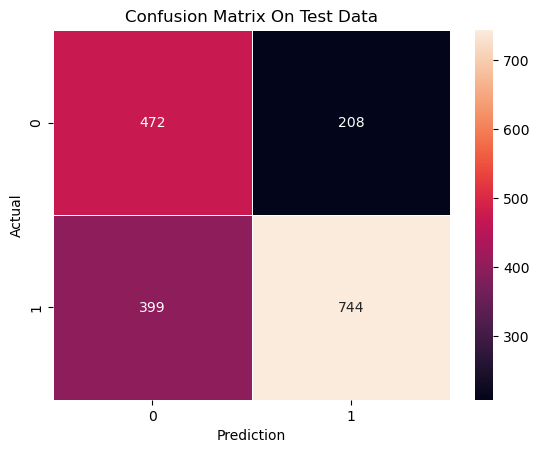

In [110]:
# confusion_matrix on validation data
cm = confusion_matrix(y_val_scaled, y_pred_cb)
print(classification_report(y_val_scaled, y_pred_cb))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Validation Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# confusion_matrix on test data
cm = confusion_matrix(y_test_scaled, y_pred_cb2)
print(classification_report(y_test_scaled, y_pred_cb2))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Test Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

### GradientBoosting

In [111]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled2, y_train_scaled2)
y_pred_gb = gb.predict(X_val_scaled)

In [112]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train_scaled)
y_pred_gb2 = gb.predict(X_test_scaled)

              precision    recall  f1-score   support

         0.0       0.56      0.80      0.66       568
         1.0       0.83      0.59      0.69       890

    accuracy                           0.68      1458
   macro avg       0.69      0.70      0.68      1458
weighted avg       0.72      0.68      0.68      1458



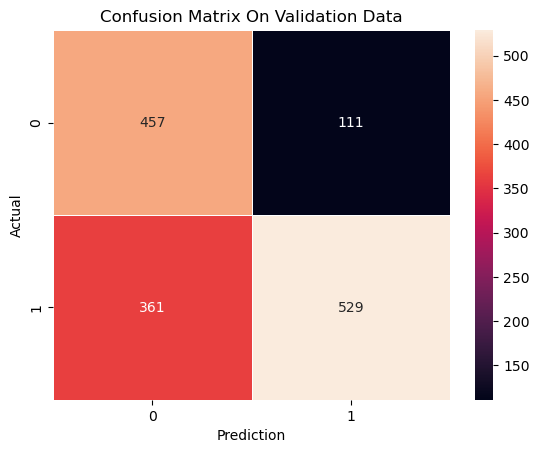

              precision    recall  f1-score   support

         0.0       0.52      0.84      0.64       680
         1.0       0.85      0.54      0.66      1143

    accuracy                           0.65      1823
   macro avg       0.69      0.69      0.65      1823
weighted avg       0.73      0.65      0.66      1823



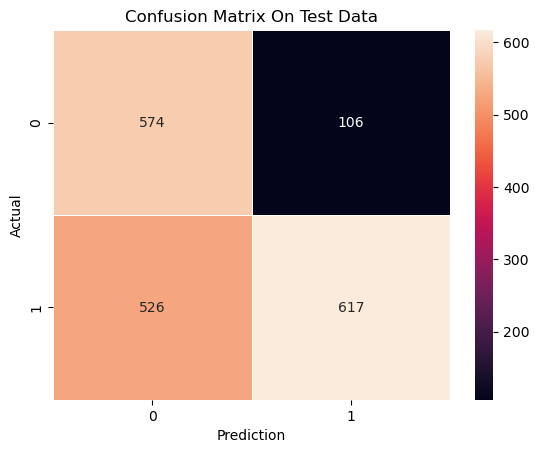

In [113]:
# confusion_matrix on validation data
cm = confusion_matrix(y_val_scaled, y_pred_gb)
print(classification_report(y_val_scaled, y_pred_gb))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Validation Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# confusion_matrix on test data
cm = confusion_matrix(y_test_scaled, y_pred_gb2)
print(classification_report(y_test_scaled, y_pred_gb2))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Test Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

### LGBM

In [114]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_scaled2, y_train_scaled2)
y_pred_lgbm = lgbm.predict(X_val_scaled)

In [115]:
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train_scaled, y_train_scaled)
y_pred_lgbm2 = lgbm.predict(X_test_scaled)

              precision    recall  f1-score   support

         0.0       0.54      0.64      0.58       568
         1.0       0.74      0.65      0.69       890

    accuracy                           0.64      1458
   macro avg       0.64      0.64      0.64      1458
weighted avg       0.66      0.64      0.65      1458



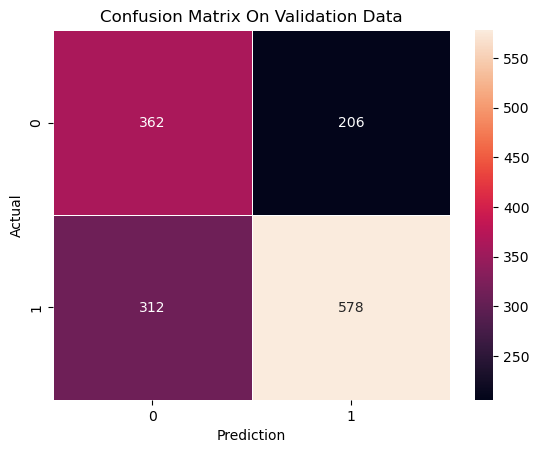

              precision    recall  f1-score   support

         0.0       0.54      0.70      0.61       680
         1.0       0.78      0.64      0.70      1143

    accuracy                           0.66      1823
   macro avg       0.66      0.67      0.66      1823
weighted avg       0.69      0.66      0.67      1823



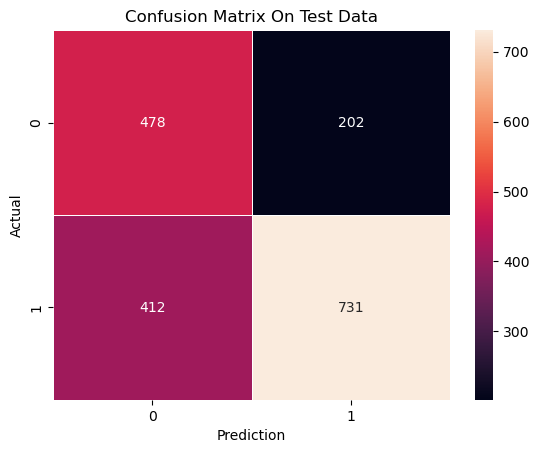

In [116]:
# confusion_matrix on validation data
cm = confusion_matrix(y_val_scaled, y_pred_lgbm)
print(classification_report(y_val_scaled, y_pred_lgbm))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Validation Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# confusion_matrix on test data
cm = confusion_matrix(y_test_scaled, y_pred_lgbm2)
print(classification_report(y_test_scaled, y_pred_lgbm2))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Test Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

### AdaBoost

In [117]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train_scaled2, y_train_scaled2)
y_pred_ab = ab.predict(X_val_scaled)

In [118]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train_scaled, y_train_scaled)
y_pred_ab2 = ab.predict(X_test_scaled)

In [119]:
# evaluate = pd.DataFrame({'AdaBoost':['Precision', 'Recall', 'F1-score', 'ROC-AUC', 'Accuracy'],
#                          'Validation':[precision_score(y_val_over, y_pred_ab), recall_score(y_val_over, y_pred_ab), f1_score(y_val_over, y_pred_ab), roc_auc_score(y_val_over, y_pred_ab), accuracy_score(y_val_over, y_pred_ab)],
#                          'Test':[precision_score(y_test_over, y_pred_ab2), recall_score(y_test_over, y_pred_ab2), f1_score(y_test_over, y_pred_ab2), roc_auc_score(y_test_over, y_pred_ab2), accuracy_score(y_test_over, y_pred_ab2)]
#                        })
# evaluate

              precision    recall  f1-score   support

         0.0       0.53      0.67      0.59       568
         1.0       0.75      0.63      0.68       890

    accuracy                           0.64      1458
   macro avg       0.64      0.65      0.64      1458
weighted avg       0.66      0.64      0.65      1458



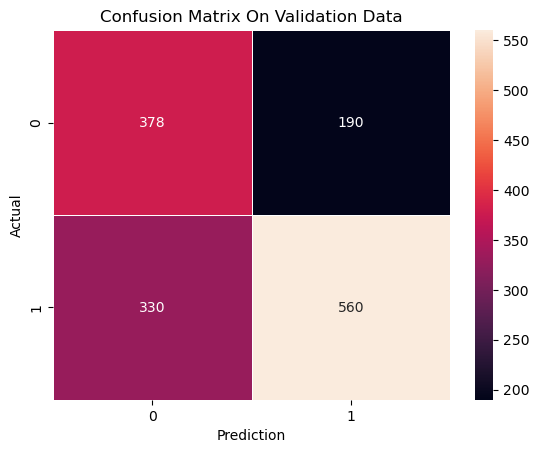

              precision    recall  f1-score   support

         0.0       0.52      0.68      0.59       680
         1.0       0.77      0.62      0.69      1143

    accuracy                           0.65      1823
   macro avg       0.64      0.65      0.64      1823
weighted avg       0.67      0.65      0.65      1823



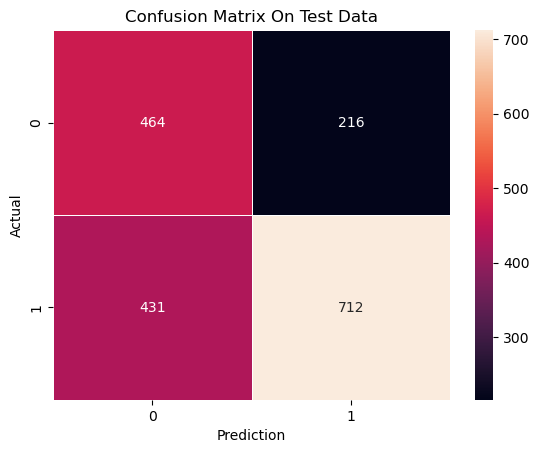

In [120]:
# confusion_matrix on validation data
cm = confusion_matrix(y_val_scaled, y_pred_ab)
print(classification_report(y_val_scaled, y_pred_ab))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Validation Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# confusion_matrix on test data
cm = confusion_matrix(y_test_scaled, y_pred_ab2)
print(classification_report(y_test_scaled, y_pred_ab2))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Test Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# Evaluation Model 

In [121]:
eval_model = pd.DataFrame({'Model':['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier', 'GaussianNB', 'SVC', 'XGBClassifier', 'CatBoostClassifier', 'GradientBoostingClassifier', 'LGBMClassifier', 'AdaBoost'],
                          'Precision_Val':[precision_score(y_val_scaled, y_pred_lr), precision_score(y_val_scaled, y_pred_dt), precision_score(y_val_scaled, y_pred_rf), precision_score(y_val_scaled, y_pred_knn), precision_score(y_val_scaled, y_pred_nb), precision_score(y_val_scaled, y_pred_svc), precision_score(y_val_scaled, y_pred_xgb), precision_score(y_val_scaled, y_pred_cb), precision_score(y_val_scaled, y_pred_gb), precision_score(y_val_scaled, y_pred_lgbm), precision_score(y_val_scaled, y_pred_ab)],
                          'Precision_Test':[precision_score(y_test_scaled, y_pred_lr2), precision_score(y_test_scaled, y_pred_dt2), precision_score(y_test_scaled, y_pred_rf2), precision_score(y_test_scaled, y_pred_knn2), precision_score(y_test_scaled, y_pred_nb2), precision_score(y_test_scaled, y_pred_svc2), precision_score(y_test_scaled, y_pred_xgb2), precision_score(y_test_scaled, y_pred_cb2), precision_score(y_test_scaled, y_pred_gb2), precision_score(y_test_scaled, y_pred_lgbm2), precision_score(y_test_scaled, y_pred_ab2)],
                          'Recall_Val':[recall_score(y_val_scaled, y_pred_lr), recall_score(y_val_scaled, y_pred_dt), recall_score(y_val_scaled, y_pred_rf), recall_score(y_val_scaled, y_pred_knn), recall_score(y_val_scaled, y_pred_nb), recall_score(y_val_scaled, y_pred_svc), recall_score(y_val_scaled, y_pred_xgb), recall_score(y_val_scaled, y_pred_cb), recall_score(y_val_scaled, y_pred_gb), recall_score(y_val_scaled, y_pred_lgbm), recall_score(y_val_scaled, y_pred_ab)],
                          'Recall_Test':[recall_score(y_test_scaled, y_pred_lr2), recall_score(y_test_scaled, y_pred_dt2), recall_score(y_test_scaled, y_pred_rf2), recall_score(y_test_scaled, y_pred_knn2), recall_score(y_test_scaled, y_pred_nb2), recall_score(y_test_scaled, y_pred_svc2), recall_score(y_test_scaled, y_pred_xgb2), recall_score(y_test_scaled, y_pred_cb2), recall_score(y_test_scaled, y_pred_gb2), recall_score(y_test_scaled, y_pred_lgbm2), recall_score(y_test_scaled, y_pred_ab2)],
                          'F1Score_Val':[f1_score(y_val_scaled, y_pred_lr), f1_score(y_val_scaled, y_pred_dt), f1_score(y_val_scaled, y_pred_rf), f1_score(y_val_scaled, y_pred_knn), f1_score(y_val_scaled, y_pred_nb), f1_score(y_val_scaled, y_pred_svc), f1_score(y_val_scaled, y_pred_xgb), f1_score(y_val_scaled, y_pred_cb), f1_score(y_val_scaled, y_pred_gb), f1_score(y_val_scaled, y_pred_lgbm), f1_score(y_val_scaled, y_pred_ab)],
                          'F1Score_Test':[f1_score(y_test_scaled, y_pred_lr2), f1_score(y_test_scaled, y_pred_dt2), f1_score(y_test_scaled, y_pred_rf2), f1_score(y_test_scaled, y_pred_knn2), f1_score(y_test_scaled, y_pred_nb2), f1_score(y_test_scaled, y_pred_svc2), f1_score(y_test_scaled, y_pred_xgb2), f1_score(y_test_scaled, y_pred_cb2), f1_score(y_test_scaled, y_pred_gb2), f1_score(y_test_scaled, y_pred_lgbm2), f1_score(y_test_scaled, y_pred_ab2)],
                          'ROCAUC_Val':[roc_auc_score(y_val_scaled, y_pred_lr), roc_auc_score(y_val_scaled, y_pred_dt), roc_auc_score(y_val_scaled, y_pred_rf), roc_auc_score(y_val_scaled, y_pred_knn), roc_auc_score(y_val_scaled, y_pred_nb), roc_auc_score(y_val_scaled, y_pred_svc), roc_auc_score(y_val_scaled, y_pred_xgb), roc_auc_score(y_val_scaled, y_pred_cb), roc_auc_score(y_val_scaled, y_pred_gb), roc_auc_score(y_val_scaled, y_pred_lgbm), roc_auc_score(y_val_scaled, y_pred_ab)],
                          'ROCAUC_Test':[roc_auc_score(y_test_scaled, y_pred_lr2), roc_auc_score(y_test_scaled, y_pred_dt2), roc_auc_score(y_test_scaled, y_pred_rf2), roc_auc_score(y_test_scaled, y_pred_knn2), roc_auc_score(y_test_scaled, y_pred_nb2), roc_auc_score(y_test_scaled, y_pred_svc2), roc_auc_score(y_test_scaled, y_pred_xgb2), roc_auc_score(y_test_scaled, y_pred_cb2), roc_auc_score(y_test_scaled, y_pred_gb2), roc_auc_score(y_test_scaled, y_pred_lgbm2), roc_auc_score(y_test_scaled, y_pred_ab2)],
                          'Accuracy_Val':[accuracy_score(y_val_scaled, y_pred_lr), accuracy_score(y_val_scaled, y_pred_dt), accuracy_score(y_val_scaled, y_pred_rf), accuracy_score(y_val_scaled, y_pred_knn), accuracy_score(y_val_scaled, y_pred_nb), accuracy_score(y_val_scaled, y_pred_svc), accuracy_score(y_val_scaled, y_pred_xgb), accuracy_score(y_val_scaled, y_pred_cb), accuracy_score(y_val_scaled, y_pred_gb), accuracy_score(y_val_scaled, y_pred_lgbm), accuracy_score(y_val_scaled, y_pred_ab)],
                          'Accuracy_Test':[accuracy_score(y_test_scaled, y_pred_lr2), accuracy_score(y_test_scaled, y_pred_dt2), accuracy_score(y_test_scaled, y_pred_rf2), accuracy_score(y_test_scaled, y_pred_knn2), accuracy_score(y_test_scaled, y_pred_nb2), accuracy_score(y_test_scaled, y_pred_svc2), accuracy_score(y_test_scaled, y_pred_xgb2), accuracy_score(y_test_scaled, y_pred_cb2), accuracy_score(y_test_scaled, y_pred_gb2), accuracy_score(y_test_scaled, y_pred_lgbm2), accuracy_score(y_test_scaled, y_pred_ab2)]
                        })
eval_model

,Model,Precision_Val,Precision_Test,Recall_Val,Recall_Test,F1Score_Val,F1Score_Test,ROCAUC_Val,ROCAUC_Test,Accuracy_Val,Accuracy_Test
0,LogisticRegression,0.712568,0.708929,0.732584,0.694663,0.722438,0.701723,0.634778,0.607626,0.656379,0.629731
1,DecisionTreeClassifier,0.715996,0.732484,0.739326,0.704287,0.727474,0.718109,0.639909,0.635967,0.661866,0.653319
2,RandomForestClassifier,0.749064,0.773227,0.674157,0.677165,0.709639,0.722015,0.660142,0.671671,0.663237,0.673066
3,KNeighborsClassifier,0.704622,0.773227,0.702247,0.677165,0.703433,0.722015,0.620490,0.671671,0.638546,0.673066
4,GaussianNB,0.994695,0.985477,0.421348,0.415573,0.591949,0.584615,0.708914,0.702639,0.645405,0.629731
5,SVC,0.781167,0.774370,0.661798,0.618548,0.716545,0.687743,0.685652,0.657803,0.680384,0.647833
6,XGBClassifier,0.729440,0.758252,0.687640,0.683290,0.707924,0.718822,0.643996,0.658557,0.653635,0.664838
7,CatBoostClassifier,0.763228,0.781513,0.648315,0.650919,0.701094,0.710263,0.666587,0.672518,0.662551,0.667032
8,GradientBoostingClassifier,0.826562,0.853389,0.594382,0.539808,0.691503,0.661308,0.699480,0.691963,0.676269,0.653319
9,LGBMClassifier,0.737245,0.783494,0.649438,0.639545,0.690562,0.704239,0.643381,0.671243,0.644719,0.663193


Observation: 
We will suppress the predicted value of FN (prediction on time but actual delay), we can use recall. Based on the model evaluation, it can be seen that Decision Tree, Logistic Regression, XGBoost, Random Forest and KNN have the highest Recall Score, so we will develop the model using hyperparameter tuning
- Recall Decision Tree = 0.70
- Recall Logistic Regression = 0.69
- Recall XGBoost = 0.68
- Recall Random Forest = 0.68
- Recall KNN = 0.68

In [122]:
# split the train data into test and train for Hyperparatemer Tunning
X = df_scaled.drop(['reached.on.time_y.n'],axis=1)
y = df_scaled['reached.on.time_y.n']
X_train_tuning, X_test_tuning, y_train_tuning, y_test_tuning = train_test_split(X, y, test_size=0.20, random_state=42)

# Split the train data into train and validation for Hyperparatemer Tunning
X = X_test_tuning
y = y_test_tuning
X_test_tuning2, X_val_tuning, y_test_tuning2, y_val_tuning = train_test_split(X, y, test_size=0.20, random_state=42)

### DecisionTree With Hyperparameter Tuning 

In [174]:
# define model
dt = DecisionTreeClassifier(random_state = 42)

# define hyperparameter
grid_param = {'criterion' : ['gini', 'entropy', 'log_loss'],
              'splitter' : ['best', 'random'],
              'max_depth' : [None, 2,4,5,6,7,8,10,12],
              'min_samples_split' : [2,3,4,6],
              'min_samples_leaf' : [1,2,4,5,6,7,8]
             }

In [175]:
grid_search = GridSearchCV(dt, grid_param, cv=3, n_jobs=2, verbose=3, scoring='recall')
grid_search.fit(X_test_tuning2, y_test_tuning2)

Fitting 3 folds for each of 1512 candidates, totalling 4536 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 2, 4, 5, 6, 7, 8, 10, 12],
                         'min_samples_leaf': [1, 2, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 6],
                         'splitter': ['best', 'random']},
             scoring='recall', verbose=3)

In [176]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [177]:
# Model with best parameters on 
dt_tuning = DecisionTreeClassifier(criterion = grid_search.best_params_['criterion'],
                                   max_depth = grid_search.best_params_['max_depth'],
                                   min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                                   min_samples_split = grid_search.best_params_['min_samples_split'],
                                   splitter = grid_search.best_params_['splitter'],
                                   random_state = 42
                                  )
dt_tuning.fit(X_test_tuning2, y_test_tuning2)
y_pred_dt = dt_tuning.predict(X_val_tuning)

In [178]:
# Model with best parameters on
dt_tuning = DecisionTreeClassifier(criterion = grid_search.best_params_['criterion'],
                                   max_depth = grid_search.best_params_['max_depth'],
                                   min_samples_leaf = grid_search.best_params_['min_samples_leaf'],
                                   min_samples_split = grid_search.best_params_['min_samples_split'],
                                   splitter = grid_search.best_params_['splitter'],
                                   random_state = 42
                                  )
dt_tuning.fit(X_train_tuning, y_train_tuning)
y_pred_dt2 = dt_tuning.predict(X_test_tuning)

In [179]:
dt_tuning = pd.DataFrame({'DT Tuning':['Precision', 'Recall', 'F1-score', 'ROC-AUC', 'Accuracy'],
                         'DT Validation':[precision_score(y_val_tuning, y_pred_dt), recall_score(y_val_tuning, y_pred_dt), f1_score(y_val_tuning, y_pred_dt), roc_auc_score(y_val_tuning, y_pred_dt), accuracy_score(y_val_tuning, y_pred_dt)],
                         'DT Test':[precision_score(y_test_tuning, y_pred_dt2), recall_score(y_test_tuning, y_pred_dt2), f1_score(y_test_tuning, y_pred_dt2), roc_auc_score(y_test_tuning, y_pred_dt2), accuracy_score(y_test_tuning, y_pred_dt2)]
                       })
dt_tuning

,DT Tuning,DT Validation,DT Test
0,Precision,0.608219,0.626988
1,Recall,1.000000,1.000000
2,F1-score,0.756388,0.770735
3,ROC-AUC,0.500000,0.500000
4,Accuracy,0.608219,0.626988


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       143
         1.0       0.61      1.00      0.76       222

    accuracy                           0.61       365
   macro avg       0.30      0.50      0.38       365
weighted avg       0.37      0.61      0.46       365



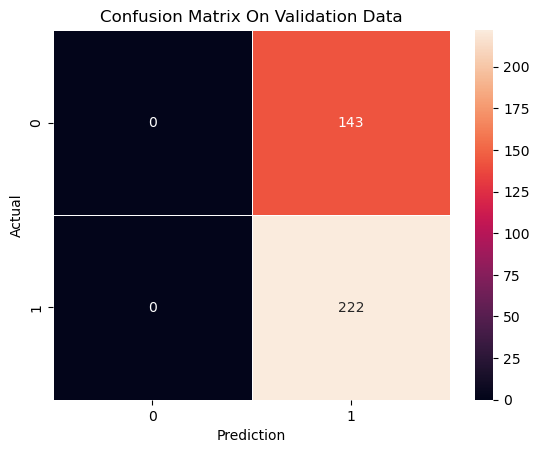

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       680
         1.0       0.63      1.00      0.77      1143

    accuracy                           0.63      1823
   macro avg       0.31      0.50      0.39      1823
weighted avg       0.39      0.63      0.48      1823



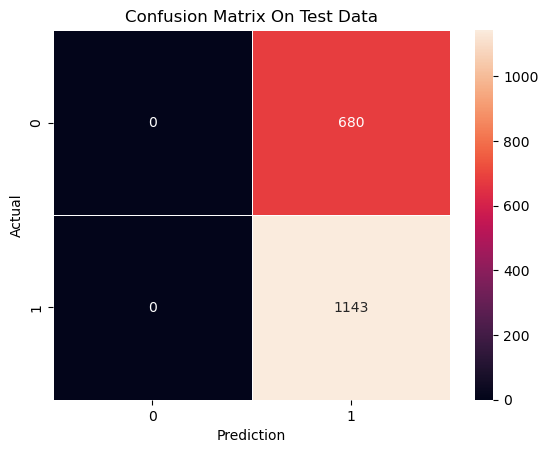

In [180]:
# confusion_matrix on validation data
cm = confusion_matrix(y_val_tuning, y_pred_dt)
print(classification_report(y_val_tuning, y_pred_dt))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Validation Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# confusion_matrix on test data
cm = confusion_matrix(y_test_tuning, y_pred_dt2)
print(classification_report(y_test_tuning, y_pred_dt2))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Test Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

In [181]:
feature_scores = pd.Series(grid_search.best_estimator_.feature_importances_, index=X_test_tuning.columns).sort_values(ascending=False)
feature_scores

discount_offered            1.0
prior_purchases             0.0
warehouse_block             0.0
mode_of_shipment            0.0
customer_care_calls         0.0
cost_of_the_product         0.0
product_importance          0.0
weight_in_gms               0.0
customer_rating_category    0.0
dtype: float64

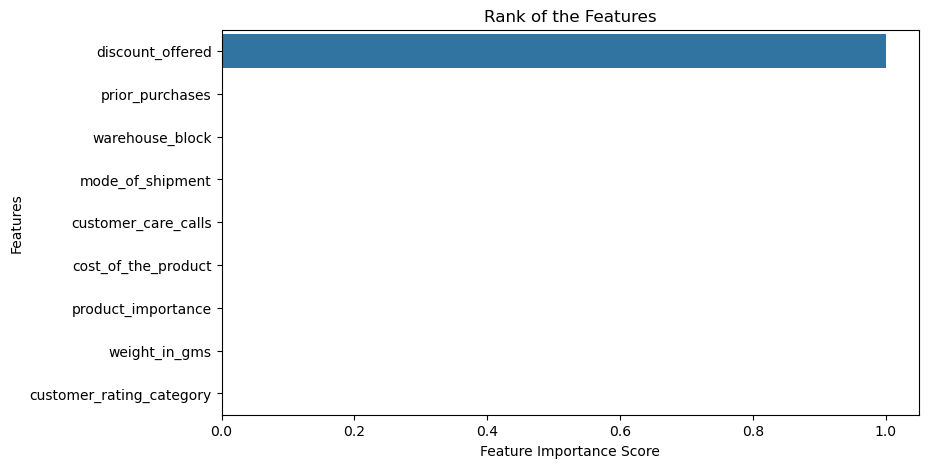

In [182]:
f, ax = plt.subplots(figsize=(9, 5))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Rank of the Features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature Importance Score")
ax.set_ylabel("Features")
plt.show()

### Logistic Regression With Hyperparameter Tuning 

In [183]:
# define model
lr = LogisticRegression(random_state = 42)

# define hyperparameter
grid_param = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
              'class_weight' : ['dict', 'balanced'],
              'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'max_iter' : [50, 80, 100, 120],
              'multi_class' : ['auto', 'ovr', 'multinomial']
             }

In [184]:
grid_search = GridSearchCV(lr, grid_param, cv=3, n_jobs=2, verbose=3, scoring='recall')
grid_search.fit(X_test_tuning2, y_test_tuning2)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42), n_jobs=2,
             param_grid={'class_weight': ['dict', 'balanced'],
                         'max_iter': [50, 80, 100, 120],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='recall', verbose=3)

In [185]:
grid_search.best_params_

{'class_weight': 'dict',
 'max_iter': 50,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [186]:
# Model with best parameters 
lr_tuning = LogisticRegression(penalty = grid_search.best_params_['penalty'], 
                               class_weight = grid_search.best_params_['class_weight'],
                               solver = grid_search.best_params_['solver'],
                               max_iter = grid_search.best_params_['max_iter'],
                               multi_class = grid_search.best_params_['multi_class'],
                               random_state = 42
                              )
lr_tuning.fit(X_test_tuning2, y_test_tuning2)
y_pred_lr = lr_tuning.predict(X_val_tuning)

In [187]:
# Model with best parameters
lr_tuning = LogisticRegression(penalty = grid_search.best_params_['penalty'], 
                               class_weight = grid_search.best_params_['class_weight'],
                               solver = grid_search.best_params_['solver'],
                               max_iter = grid_search.best_params_['max_iter'],
                               multi_class = grid_search.best_params_['multi_class'],
                               random_state = 42
                              )
lr_tuning.fit(X_train_tuning, y_train_tuning)
y_pred_lr2 = lr_tuning.predict(X_test_tuning)

In [188]:
lr_tuning = pd.DataFrame({'LR Tuning':['Precision', 'Recall', 'F1-score', 'ROC-AUC', 'Accuracy'],
                         'LR Validation':[precision_score(y_val_tuning, y_pred_lr), recall_score(y_val_tuning, y_pred_lr), f1_score(y_val_tuning, y_pred_lr), roc_auc_score(y_val_tuning, y_pred_lr), accuracy_score(y_val_tuning, y_pred_lr)],
                         'LR Test':[precision_score(y_test_tuning, y_pred_lr2), recall_score(y_test_tuning, y_pred_lr2), f1_score(y_test_tuning, y_pred_lr2), roc_auc_score(y_test_tuning, y_pred_lr2), accuracy_score(y_test_tuning, y_pred_lr2)]
                       })
lr_tuning

,LR Tuning,LR Validation,LR Test
0,Precision,0.664179,0.708929
1,Recall,0.801802,0.694663
2,F1-score,0.726531,0.701723
3,ROC-AUC,0.586216,0.607626
4,Accuracy,0.632877,0.629731


              precision    recall  f1-score   support

         0.0       0.55      0.37      0.44       143
         1.0       0.66      0.80      0.73       222

    accuracy                           0.63       365
   macro avg       0.61      0.59      0.58       365
weighted avg       0.62      0.63      0.61       365



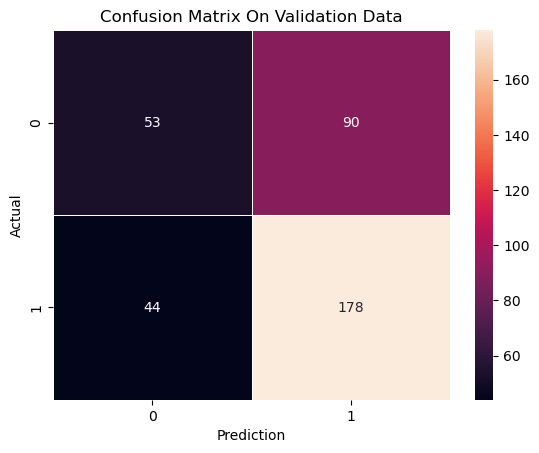

              precision    recall  f1-score   support

         0.0       0.50      0.52      0.51       680
         1.0       0.71      0.69      0.70      1143

    accuracy                           0.63      1823
   macro avg       0.61      0.61      0.61      1823
weighted avg       0.63      0.63      0.63      1823



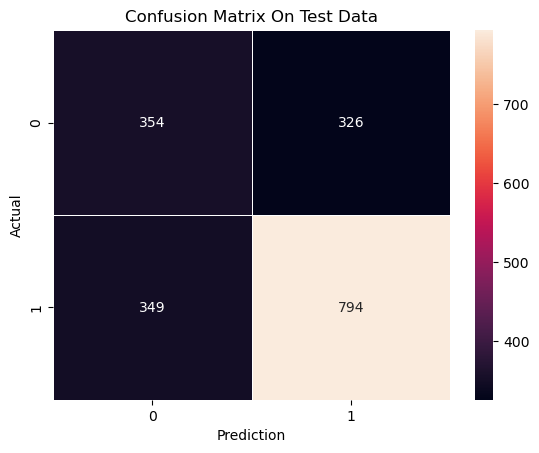

In [189]:
# confusion_matrix on validation data
cm = confusion_matrix(y_val_tuning, y_pred_lr)
print(classification_report(y_val_tuning, y_pred_lr))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Validation Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

# confusion_matrix on test data
cm = confusion_matrix(y_test_tuning, y_pred_lr2)
print(classification_report(y_test_tuning, y_pred_lr2))
sns.heatmap(cm, annot=True, linewidth=0.5, fmt='d')
plt.title('Confusion Matrix On Test Data')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.show()

### Comparison of Hyperparameters Tuning Model

In [190]:
tuning = pd.concat([dt_tuning, lr_tuning.drop(['LR Tuning'],axis=1)], axis=1)
tuning

,DT Tuning,DT Validation,DT Test,LR Validation,LR Test
0,Precision,0.608219,0.626988,0.664179,0.708929
1,Recall,1.000000,1.000000,0.801802,0.694663
2,F1-score,0.756388,0.770735,0.726531,0.701723
3,ROC-AUC,0.500000,0.500000,0.586216,0.607626
4,Accuracy,0.608219,0.626988,0.632877,0.629731


# Hypothesis Testing

##### Does discount_offered affect reached.on.time_y.n or not?
H0 : discount_offered NOT affect the reached.on.time_y.n (have the same average discount value) <br>
H1 : discount_offered affect the reached.on.time_y.n (have a significantly different mean value)

In [140]:
# Grouping data in column reached.on.time_y.n
df_ontime = df_scaled[df_scaled['reached.on.time_y.n'] == 0]
df_late = df_scaled[df_scaled['reached.on.time_y.n'] == 1]

In [141]:
# calculate the mean or average discount_offered in each group of data columns reached.on.time_y.n
df_scaled.groupby(['reached.on.time_y.n'])['discount_offered'].mean()

reached.on.time_y.n
0.0    0.070996
1.0    0.272379
Name: discount_offered, dtype: float64

In [142]:
# calculate the mean or middle value discount_offered in each group of data columns reached.on.time_y.n
df_scaled.groupby(['reached.on.time_y.n'])['discount_offered'].median()

reached.on.time_y.n
0.0    0.078125
1.0    0.125000
Name: discount_offered, dtype: float64

In [143]:
# calculate the P-Value of each data set in the reached.on.time_y.n column
disc_pvalue = st.f_oneway(df_ontime['discount_offered'],
                          df_late['discount_offered']).pvalue
disc_pvalue

2e-323

In [144]:
if disc_pvalue > 0.05:
    print('Not enough evidence to suggest that differences in discount_offered affect reached.on.time_y.n (Accepts H0)')
else:
    print('The results of the hypothesis test state that discount_offered has a significant effect on reached.on.time_y.n (Rejects H0)')

The results of the hypothesis test state that discount_offered has a significant effect on reached.on.time_y.n (Rejects H0)
